In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [2]:
# Link to Data Used = https://github.com/nytimes/covid-19-data

In [3]:
# Let's read in the US Data
# total_us_data = pd.read_csv('NYT-US-Data/us-states-2020-3-31.csv.csv')
# total_us_data = pd.read_csv('NYT-US-Data/us-states-2020-04-05.csv')
# total_us_data = pd.read_csv('NYT-US-Data/us-states-2020-04-06.csv')
# total_us_data = pd.read_csv('NYT-US-Data/us-states-2020-04-07.csv')
# total_us_data = pd.read_csv('NYT-US-Data/us-states-2020-04-09.csv')
total_us_data = pd.read_csv('NYT-US-Data/us-states-2020-04-14.csv')

In [4]:
# let's give the data a look
total_us_data.head()

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0


In [5]:
# Let's check for nulls
total_us_data.isnull().sum()

date      0
state     0
fips      0
cases     0
deaths    0
dtype: int64

In [6]:
# Let's check on the different states
total_us_data.state.unique()

array(['Washington', 'Illinois', 'California', 'Arizona', 'Massachusetts',
       'Wisconsin', 'Texas', 'Nebraska', 'Utah', 'Oregon', 'Florida',
       'New York', 'Rhode Island', 'Georgia', 'New Hampshire',
       'North Carolina', 'New Jersey', 'Colorado', 'Maryland', 'Nevada',
       'Tennessee', 'Hawaii', 'Indiana', 'Kentucky', 'Minnesota',
       'Oklahoma', 'Pennsylvania', 'South Carolina',
       'District of Columbia', 'Kansas', 'Missouri', 'Vermont',
       'Virginia', 'Connecticut', 'Iowa', 'Louisiana', 'Ohio', 'Michigan',
       'South Dakota', 'Arkansas', 'Delaware', 'Mississippi',
       'New Mexico', 'North Dakota', 'Wyoming', 'Alaska', 'Maine',
       'Alabama', 'Idaho', 'Montana', 'Puerto Rico', 'Virgin Islands',
       'Guam', 'West Virginia', 'Northern Mariana Islands',
       'American Samoa'], dtype=object)

### Let's Check on and Add Some Data

In [7]:
# Date isn't DateTime Yet
total_us_data.dtypes

date      object
state     object
fips       int64
cases      int64
deaths     int64
dtype: object

In [8]:
# Fixed it
total_us_data['date'] = pd.to_datetime(total_us_data['date'])

In [9]:
# Took me a few days, but I figured out how to do pct_change with groupby
# This will show the percent change in cases by day
total_us_data['percent_change'] = total_us_data.groupby('state').cases.pct_change()
total_us_data['percent_change'].fillna(0, inplace=True)

In [10]:
# Let's add a difference column
total_us_data['change_in_cases'] = total_us_data.groupby('state')['cases'].diff()

In [11]:
total_us_data[total_us_data['state'] == 'Utah'].tail()

,date,state,fips,cases,deaths,percent_change,change_in_cases
2097,2020-04-09,Utah,49,1980,13,0.056000,105.0
2153,2020-04-10,Utah,49,2103,17,0.062121,123.0
2209,2020-04-11,Utah,49,2206,18,0.048978,103.0
2265,2020-04-12,Utah,49,2303,18,0.043971,97.0
2321,2020-04-13,Utah,49,2363,18,0.026053,60.0


In [12]:
# Looks good
total_us_data.head()

,date,state,fips,cases,deaths,percent_change,change_in_cases
0,2020-01-21,Washington,53,1,0,0.0,NaN
1,2020-01-22,Washington,53,1,0,0.0,0.0
2,2020-01-23,Washington,53,1,0,0.0,0.0
3,2020-01-24,Illinois,17,1,0,0.0,NaN
4,2020-01-24,Washington,53,1,0,0.0,0.0


### Separating the Data by State

In [84]:
# Let's make a funciton to seperate these
def state_info(state):
    data = total_us_data[total_us_data.state == state]
    data.date = pd.to_datetime(data.date)
    data = data.set_index(data.date)
#     data['percent_change'] = data.cases.pct_change()
#     data.percent_change.fillna(0, inplace=True)
    return data.drop(labels='date', axis=1)

In [85]:
# Function Test
state_info('Northern Mariana Islands').head()

C:\Users\nolan\AppData\Roaming\Python\Python37\site-packages\pandas\core\generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,state,fips,cases,deaths,percent_change,change_in_cases
date,,,,,,
2020-03-28,Northern Mariana Islands,69,2,0,0.0,NaN
2020-03-29,Northern Mariana Islands,69,2,0,0.0,0.0
2020-03-30,Northern Mariana Islands,69,2,0,0.0,0.0
2020-03-31,Northern Mariana Islands,69,2,0,0.0,0.0
2020-04-01,Northern Mariana Islands,69,6,1,2.0,4.0


In [86]:
# Don't know how to make a function to do this, so here we go
washington_data = state_info(total_us_data.state.unique()[0])
illinois_data = state_info(total_us_data.state.unique()[1])
california_data = state_info(total_us_data.state.unique()[2])
arizona_data = state_info(total_us_data.state.unique()[3])
massachusetts_data = state_info(total_us_data.state.unique()[4])
wisconsin_data = state_info(total_us_data.state.unique()[5])
texas_data = state_info(total_us_data.state.unique()[6])
nebraska_data = state_info(total_us_data.state.unique()[7])
utah_data = state_info(total_us_data.state.unique()[8])
oregon_data = state_info(total_us_data.state.unique()[9])
florida_data = state_info(total_us_data.state.unique()[10])
new_york_data = state_info(total_us_data.state.unique()[11])
rhode_island_data = state_info(total_us_data.state.unique()[12])
georgia_data = state_info(total_us_data.state.unique()[13])
new_hampshire_data = state_info(total_us_data.state.unique()[14])
north_carolina_data = state_info(total_us_data.state.unique()[15])
new_jersey_data = state_info(total_us_data.state.unique()[16])
colorado_data = state_info(total_us_data.state.unique()[17])
maryland_data = state_info(total_us_data.state.unique()[18])
nevada_data = state_info(total_us_data.state.unique()[19])
tennessee_data = state_info(total_us_data.state.unique()[20])
hawaii_data = state_info(total_us_data.state.unique()[21])
indiana_data = state_info(total_us_data.state.unique()[22])
kentucky_data = state_info(total_us_data.state.unique()[23])
minnesota_data = state_info(total_us_data.state.unique()[24])
oklahoma_data = state_info(total_us_data.state.unique()[25])
pennsylvania_data = state_info(total_us_data.state.unique()[26])
south_carolina_data = state_info(total_us_data.state.unique()[27])
dc_data = state_info(total_us_data.state.unique()[28])
kansas_data = state_info(total_us_data.state.unique()[29])
missouri_data = state_info(total_us_data.state.unique()[30])
vermont_data = state_info(total_us_data.state.unique()[31])
virginia_data = state_info(total_us_data.state.unique()[32])
connecticut_data = state_info(total_us_data.state.unique()[33])
iowa_data = state_info(total_us_data.state.unique()[34])
louisiana_data = state_info(total_us_data.state.unique()[35])
ohio_data = state_info(total_us_data.state.unique()[36])
michigan_data = state_info(total_us_data.state.unique()[37])
south_dakota_data = state_info(total_us_data.state.unique()[38])
arkansas_data = state_info(total_us_data.state.unique()[39])
delaware_data = state_info(total_us_data.state.unique()[40])
mississippi_data = state_info(total_us_data.state.unique()[41])
new_mexico_data = state_info(total_us_data.state.unique()[42])
north_dakota_data = state_info(total_us_data.state.unique()[43])
wyoming_data = state_info(total_us_data.state.unique()[44])
alaska_data = state_info(total_us_data.state.unique()[45])
maine_data = state_info(total_us_data.state.unique()[46])
alabama_data = state_info(total_us_data.state.unique()[47])
idaho_data = state_info(total_us_data.state.unique()[48])
montana_data = state_info(total_us_data.state.unique()[49])
puerto_rico_data = state_info(total_us_data.state.unique()[50])
virgin_islands_data = state_info(total_us_data.state.unique()[51])
guam_data = state_info(total_us_data.state.unique()[52])
west_virginia_data = state_info(total_us_data.state.unique()[53])
north_mariana_islands_data = state_info(total_us_data.state.unique()[54])

In [16]:
puerto_rico_data.tail()

,state,fips,cases,deaths,percent_change,change_in_cases
date,,,,,,
2020-04-09,Puerto Rico,72,683,33,0.101613,63.0
2020-04-10,Puerto Rico,72,725,39,0.061493,42.0
2020-04-11,Puerto Rico,72,788,42,0.086897,63.0
2020-04-12,Puerto Rico,72,897,44,0.138325,109.0
2020-04-13,Puerto Rico,72,903,45,0.006689,6.0


# EDA Time

In [17]:
# Before getting to the graphs, I want to touch on one point.
# I want to analyze the effect had by measures taken by varying states, to check if they slowed growth in a notable way.
# According to the WHO website, https://www.who.int/news-room/q-a-detail/q-a-coronaviruses,
# the incubation period for coronavirus is 1-14 day, but most commonly is 5 days.
# Despite the 5 day being the 'most' line, I think a full week is a reasonable delay.
# As such, I will be giving a 7 day delay to check for possible effects government measures.

In [18]:
# CNN has data on when stay at home orders were eneacted, and links to each state's information.
# https://www.cnn.com/2020/03/23/us/coronavirus-which-states-stay-at-home-order-trnd/index.html

In [19]:
# Since 1000 cases in a state has been Treated as a major is being treated as a milestone, let's make a formula to add that to the graphs
def thousand_case_milestone(state):
    plt.vlines(x=state[state.cases>1000][:1].index, ymin=0, ymax=1, linestyle=(0, (3, 5, 1, 5)), color='darkred', label="One Thousand Case Milestone")

In [20]:
# And we'll add another line for the National State of Emergency
def national_state_of_emergency():
    plt.vlines(x=dt.date(2020, 3, 13), ymin=0, ymax=1, color='red')

In [21]:
# And a function to check the current spread rate
def most_recent(state):
    plt.text(x=state.index[-1], y=state.percent_change[-1]+0.02, s=f'{round(state.percent_change[-1]*100, 1)}%')

### Washington State

C:\Users\nolan\AppData\Roaming\Python\Python37\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


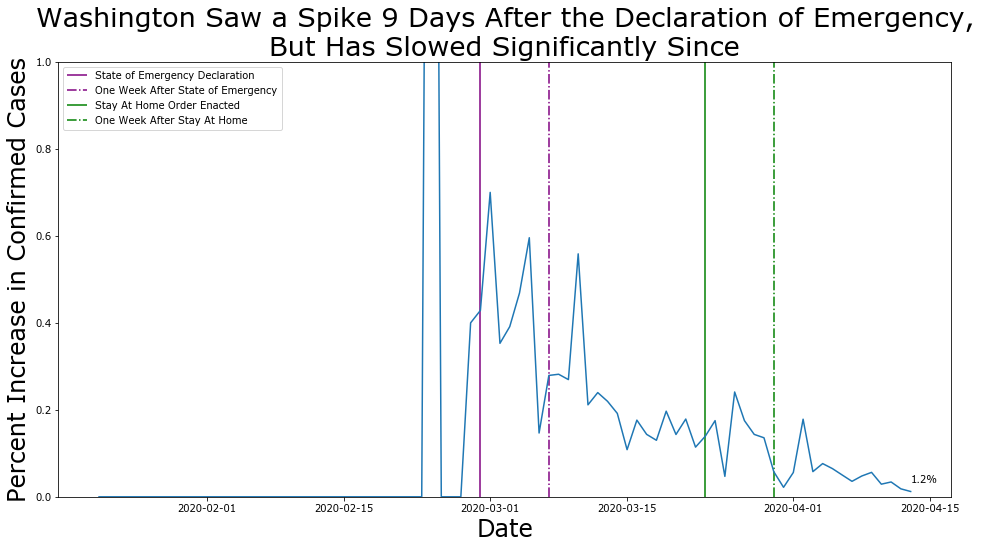

In [22]:
plt.figure(figsize=(16,8))
plt.title("Washington Saw a Spike 9 Days After the Declaration of Emergency,\nBut Has Slowed Significantly Since", size=27)

plt.xlabel('Date', size=24)
plt.ylabel('Percent Increase in Confirmed Cases', size=24)

# https://www.governor.wa.gov/news-media/inslee-issues-covid-19-emergency-proclamation
plt.vlines(x=dt.date(2020, 2, 29), ymin=0, ymax=1, linestyles='solid', color='purple', label='State of Emergency Declaration')
plt.vlines(x=dt.date(2020, 3, 7), ymin=0, ymax=1, linestyle='dashdot', color='purple', label='One Week After State of Emergency')

# https://medium.com/wagovernor/inslee-announces-stay-home-stay-healthy-order-4891a7511f5e
plt.vlines(x=dt.date(2020, 3, 23), ymin=0, ymax=1, linestyles='solid', color='green', label='Stay At Home Order Enacted')
plt.vlines(x=dt.date(2020, 3, 30), ymin=0, ymax=1, linestyle='dashdot', color='green', label='One Week After Stay At Home')

# thousand_case_milestone(washington_data)

most_recent(washington_data)

plt.ylim(ymin=0, ymax=1)

plt.plot(washington_data.percent_change)

plt.legend(loc='upper left');

### Illinois

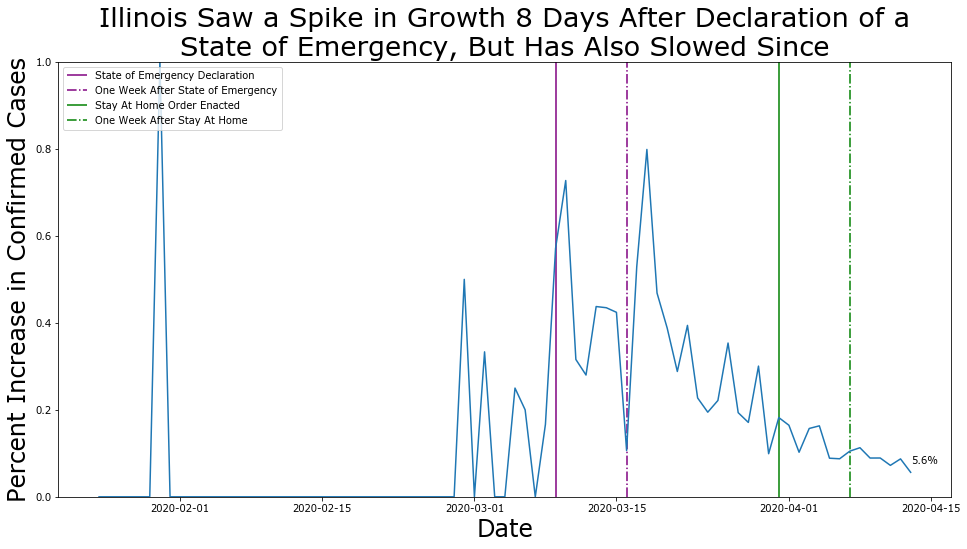

In [23]:
plt.figure(figsize=(16,8))
plt.title("Illinois Saw a Spike in Growth 8 Days After Declaration of a\nState of Emergency, But Has Also Slowed Since", size=27)

plt.xlabel('Date', size=24)
plt.ylabel('Percent Increase in Confirmed Cases', size=24)

# https://thesouthern.com/news/local/state-and-regional/illinois-governor-declares-state-of-emergency-due-to-covid-/article_5221117c-75e7-5609-97e2-b54a39e03473.html
plt.vlines(x=dt.date(2020, 3, 9), ymin=0, ymax=1, linestyles='solid', color='purple', label='State of Emergency Declaration')
plt.vlines(x=dt.date(2020, 3, 16), ymin=0, ymax=1, linestyle='dashdot', color='purple', label='One Week After State of Emergency')

# https://www.illinoispolicy.org/pritzker-extends-illinois-stay-at-home-order-through-april-30/
plt.vlines(x=dt.date(2020, 3, 31), ymin=0, ymax=1, linestyles='solid', color='green', label='Stay At Home Order Enacted')
plt.vlines(x=dt.date(2020, 4, 7), ymin=0, ymax=1, linestyle='dashdot', color='green', label='One Week After Stay At Home')

# thousand_case_milestone(illinois_data)

most_recent(illinois_data)

plt.ylim(ymin=0, ymax=1)

plt.plot(illinois_data.percent_change)

plt.legend(loc='upper left');

### California

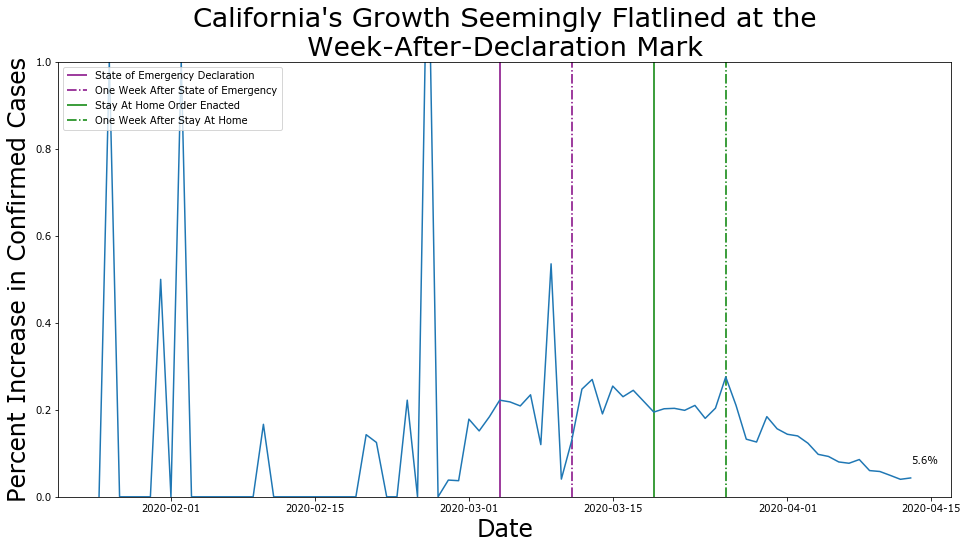

In [24]:
plt.figure(figsize=(16,8))
plt.title("California's Growth Seemingly Flatlined at the\nWeek-After-Declaration Mark", size=27)

plt.xlabel('Date', size=24)
plt.ylabel('Percent Increase in Confirmed Cases', size=24)

# https://www.gov.ca.gov/2020/03/04/governor-newsom-declares-state-of-emergency-to-help-state-prepare-for-broader-spread-of-covid-19/
plt.vlines(x=dt.date(2020, 3, 4), ymin=0, ymax=1, linestyles='solid', color='purple', label='State of Emergency Declaration')
plt.vlines(x=dt.date(2020, 3, 11), ymin=0, ymax=1, linestyle='dashdot', color='purple', label='One Week After State of Emergency')

# https://www.natlawreview.com/article/covid-19-california-institutes-statewide-stay-home-order-to-combat-covid-19
plt.vlines(x=dt.date(2020, 3, 19), ymin=0, ymax=1, linestyles='solid', color='green', label='Stay At Home Order Enacted')
plt.vlines(x=dt.date(2020, 3, 26), ymin=0, ymax=1, linestyle='dashdot', color='green', label='One Week After Stay At Home')

# thousand_case_milestone(california_data)

most_recent(illinois_data)

plt.ylim(ymin=0, ymax=1)

plt.plot(california_data.percent_change)

plt.legend(loc='upper left');

### Arizona

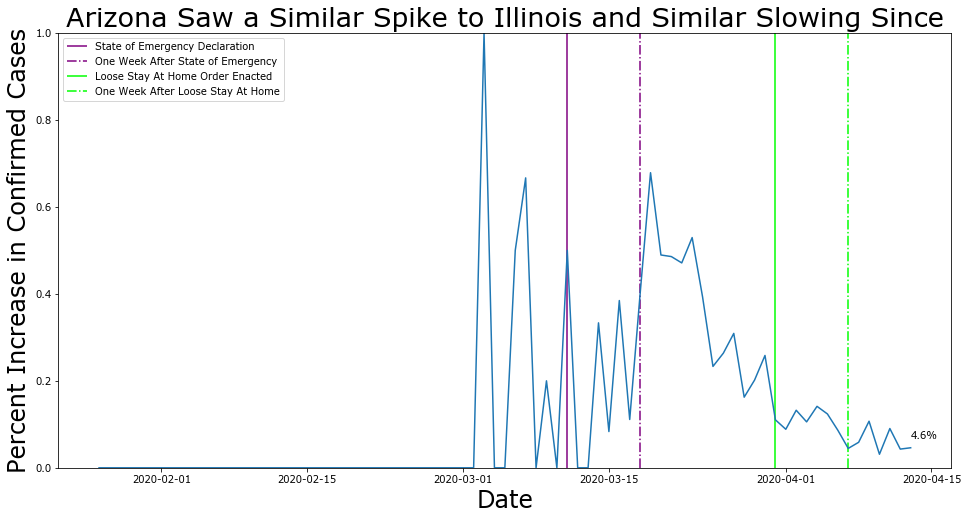

In [25]:
plt.figure(figsize=(16,8))
plt.title("Arizona Saw a Similar Spike to Illinois and Similar Slowing Since", size=27)

plt.xlabel('Date', size=24)
plt.ylabel('Percent Increase in Confirmed Cases', size=24)

# https://www.azcentral.com/story/news/politics/arizona/2020/03/11/ducey-declares-health-emergency-arizona-new-coronavirus/5025505002/
plt.vlines(x=dt.date(2020, 3, 11), ymin=0, ymax=1, linestyles='solid', color='purple', label='State of Emergency Declaration')
plt.vlines(x=dt.date(2020, 3, 18), ymin=0, ymax=1, linestyle='dashdot', color='purple', label='One Week After State of Emergency')

# https://www.nbcnews.com/news/us-news/arizona-mayors-slam-covid-19-stay-home-order-allows-hair-n1174186
plt.vlines(x=dt.date(2020, 3, 31), ymin=0, ymax=1, linestyles='solid', color='lime', label='Loose Stay At Home Order Enacted')
plt.vlines(x=dt.date(2020, 4, 7), ymin=0, ymax=1, linestyle='dashdot', color='lime', label='One Week After Loose Stay At Home')

# thousand_case_milestone(arizona_data)

most_recent(arizona_data)

plt.ylim(ymin=0, ymax=1)

plt.plot(arizona_data.percent_change)

plt.legend(loc='upper left');

### Massachusetts

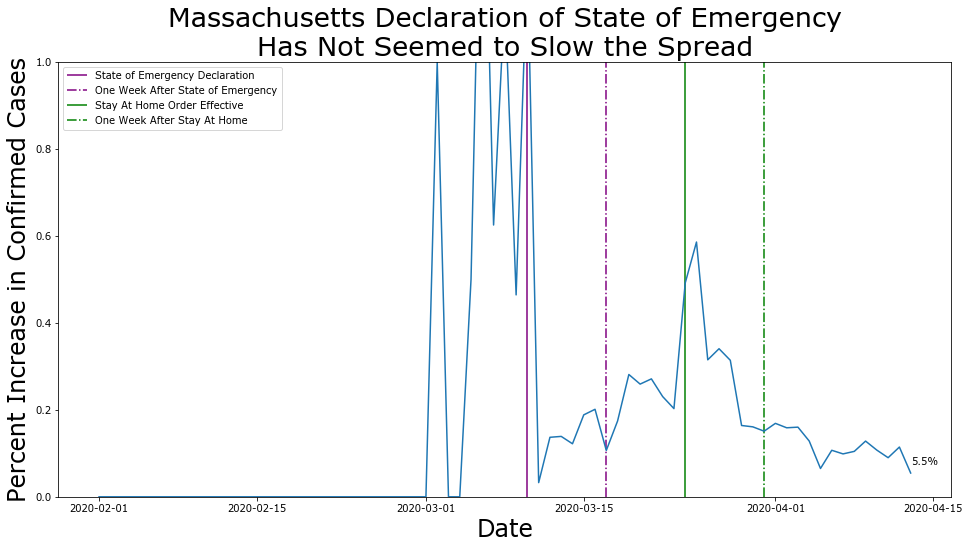

In [26]:
plt.figure(figsize=(16,8))
plt.title("Massachusetts Declaration of State of Emergency\nHas Not Seemed to Slow the Spread", size=27)

plt.xlabel('Date', size=24)
plt.ylabel('Percent Increase in Confirmed Cases', size=24)

# https://www.mass.gov/info-details/covid-19-state-of-emergency
plt.vlines(x=dt.date(2020, 3, 10), ymin=0, ymax=1, linestyles='solid', color='purple', label='State of Emergency Declaration')
plt.vlines(x=dt.date(2020, 3, 17), ymin=0, ymax=1, linestyle='dashdot', color='purple', label='One Week After State of Emergency')

# https://www.mass.gov/news/governor-charlie-baker-orders-all-non-essential-businesses-to-cease-in-person-operation
plt.vlines(x=dt.date(2020, 3, 24), ymin=0, ymax=1, linestyles='solid', color='green', label='Stay At Home Order Effective')
plt.vlines(x=dt.date(2020, 3, 31), ymin=0, ymax=1, linestyle='dashdot', color='green', label='One Week After Stay At Home')

# thousand_case_milestone(massachusetts_data)

most_recent(massachusetts_data)

plt.ylim(ymin=0, ymax=1)

plt.plot(massachusetts_data.percent_change)

plt.legend(loc='upper left');

### Wisconsin

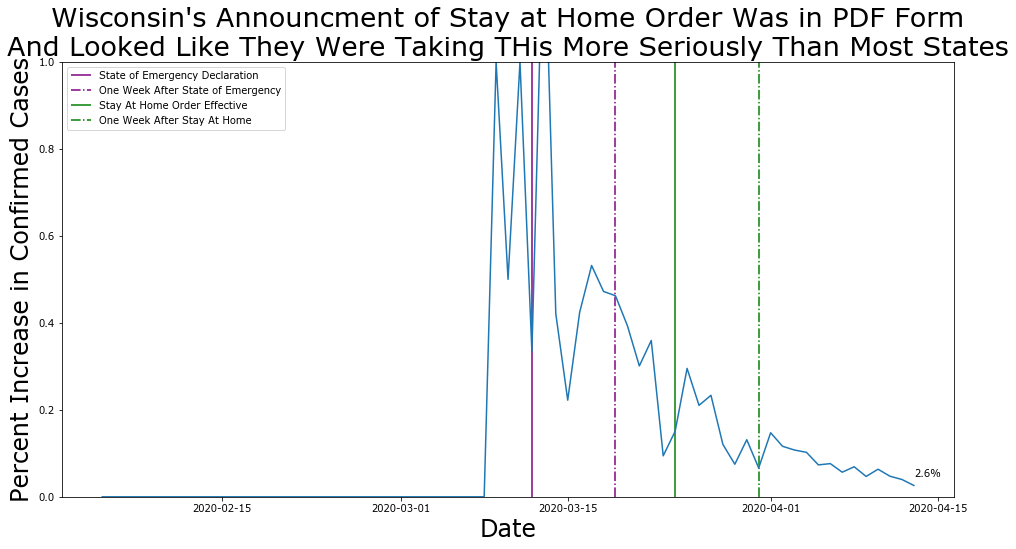

In [27]:
plt.figure(figsize=(16,8))
plt.title("Wisconsin's Announcment of Stay at Home Order Was in PDF Form\nAnd Looked Like They Were Taking THis More Seriously Than Most States", size=27)

plt.xlabel('Date', size=24)
plt.ylabel('Percent Increase in Confirmed Cases', size=24)

# https://evers.wi.gov/Documents/COVID19/EMO12-SaferAtHome.pdf
plt.vlines(x=dt.date(2020, 3, 12), ymin=0, ymax=1, linestyles='solid', color='purple', label='State of Emergency Declaration')
plt.vlines(x=dt.date(2020, 3, 19), ymin=0, ymax=1, linestyle='dashdot', color='purple', label='One Week After State of Emergency')

# https://www.natlawreview.com/article/covid-19-von-briesen-task-force-resource-analysis-wisconsin-s-stay-home-order
plt.vlines(x=dt.date(2020, 3, 24), ymin=0, ymax=1, linestyles='solid', color='green', label='Stay At Home Order Effective')
plt.vlines(x=dt.date(2020, 3, 31), ymin=0, ymax=1, linestyle='dashdot', color='green', label='One Week After Stay At Home')

# thousand_case_milestone(wisconsin_data)

most_recent(wisconsin_data)

plt.ylim(ymin=0, ymax=1)

plt.plot(wisconsin_data.percent_change)

plt.legend(loc='upper left');

### Texas

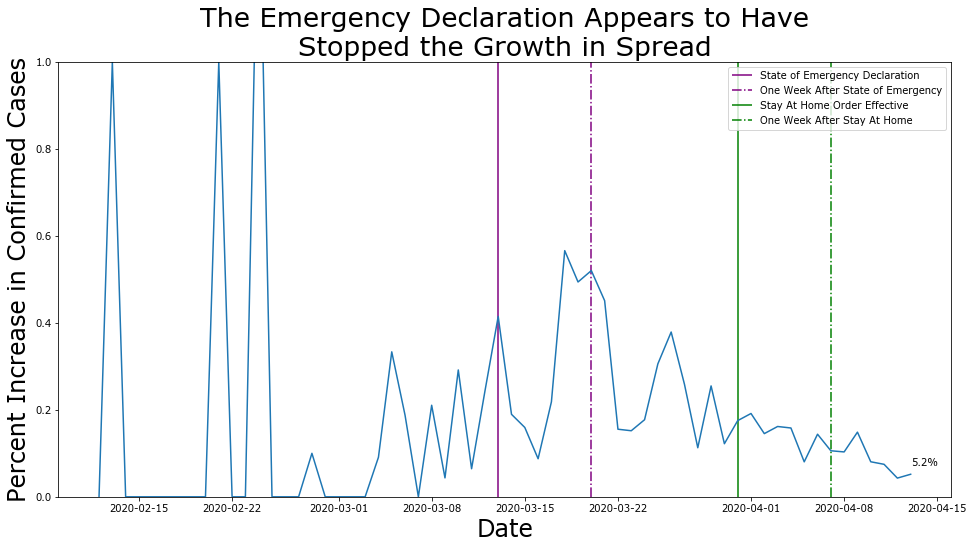

In [28]:
plt.figure(figsize=(16,8))
plt.title("The Emergency Declaration Appears to Have\nStopped the Growth in Spread", size=27)

plt.xlabel('Date', size=24)
plt.ylabel('Percent Increase in Confirmed Cases', size=24)

# https://gov.texas.gov/news/post/governor-abbott-declares-state-of-disaster-in-texas-due-to-covid-19
plt.vlines(x=dt.date(2020, 3, 13), ymin=0, ymax=1, linestyles='solid', color='purple', label='State of Emergency Declaration')
plt.vlines(x=dt.date(2020, 3, 20), ymin=0, ymax=1, linestyle='dashdot', color='purple', label='One Week After State of Emergency')

# https://www.texastribune.org/2020/03/31/greg-abbott-texas-executive-order-closures/
plt.vlines(x=dt.date(2020, 3, 31), ymin=0, ymax=1, linestyles='solid', color='green', label='Stay At Home Order Effective')
plt.vlines(x=dt.date(2020, 4, 7), ymin=0, ymax=1, linestyle='dashdot', color='green', label='One Week After Stay At Home')

# thousand_case_milestone(texas_data)

most_recent(texas_data)

plt.ylim(ymin=0, ymax=1)

plt.plot(texas_data.percent_change)

plt.legend();

### Nebraska

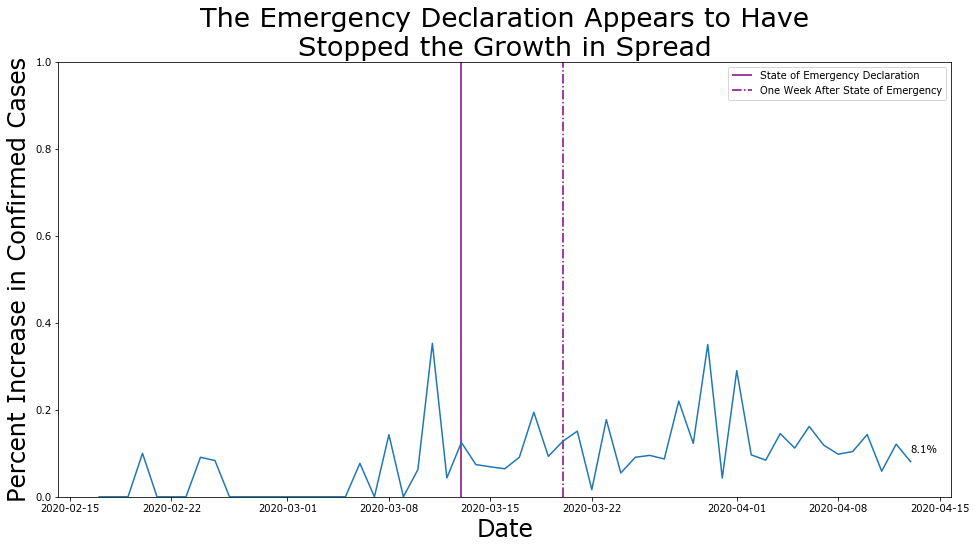

In [29]:
plt.figure(figsize=(16,8))
plt.title("The Emergency Declaration Appears to Have\nStopped the Growth in Spread", size=27)

plt.xlabel('Date', size=24)
plt.ylabel('Percent Increase in Confirmed Cases', size=24)

# https://governor.nebraska.gov/press/gov-ricketts-issues-emergency-declaration-covid-19
plt.vlines(x=dt.date(2020, 3, 13), ymin=0, ymax=1, linestyles='solid', color='purple', label='State of Emergency Declaration')
plt.vlines(x=dt.date(2020, 3, 20), ymin=0, ymax=1, linestyle='dashdot', color='purple', label='One Week After State of Emergency')

# No Stay at Home Order so far
# https://www.ketv.com/article/coronavirus-thursday-gov-ricketts-update-nebraska/32021537
# plt.vlines(x=dt.date(), ymin=0, ymax=1, linestyles='solid', color='green', label='Stay At Home Order Effective')
# plt.vlines(x=dt.date(), ymin=0, ymax=1, linestyle='dashdot', color='green', label='One Week After Stay At Home')

# thousand_case_milestone(nebraska_data)

most_recent(nebraska_data)

plt.ylim(ymin=0, ymax=1)

plt.plot(nebraska_data.percent_change)

plt.legend();

### Utah

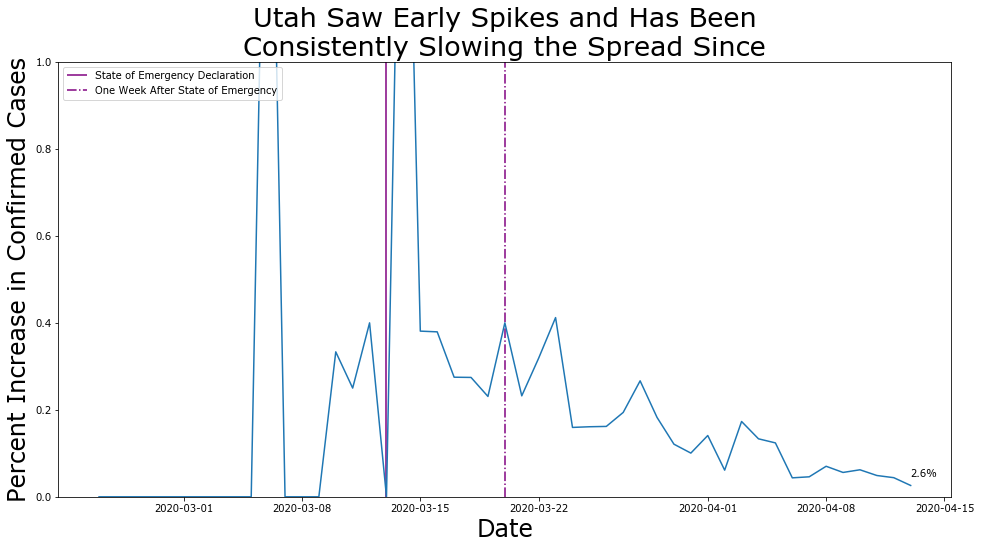

In [30]:
plt.figure(figsize=(16,8))
plt.title("Utah Saw Early Spikes and Has Been\nConsistently Slowing the Spread Since", size=27)

plt.xlabel('Date', size=24)
plt.ylabel('Percent Increase in Confirmed Cases', size=24)

# https://governor.utah.gov/2020/03/06/gov-herbert-declares-state-of-emergency/
plt.vlines(x=dt.date(2020, 3, 13), ymin=0, ymax=1, linestyles='solid', color='purple', label='State of Emergency Declaration')
plt.vlines(x=dt.date(2020, 3, 20), ymin=0, ymax=1, linestyle='dashdot', color='purple', label='One Week After State of Emergency')

# https://www.deseret.com/utah/2020/4/2/21204511/coronavirus-why-doesnt-utah-have-stay-at-home-order-covid-19-salt-lake
# The Mayor of Salt Lake City has requested it, but the Stay at Home Order has not been called
# plt.vlines(x=dt.date(), ymin=0, ymax=1, linestyles='solid', color='green', label='Stay At Home Order Enacted')
# plt.vlines(x=dt.date(), ymin=0, ymax=1, linestyle='dashdot', color='green', label='One Week After Stay At Home')

# thousand_case_milestone(utah_data)

most_recent(utah_data)

plt.ylim(ymin=0, ymax=1)

plt.plot(utah_data.percent_change)

plt.legend(loc='upper left');

### Oregon

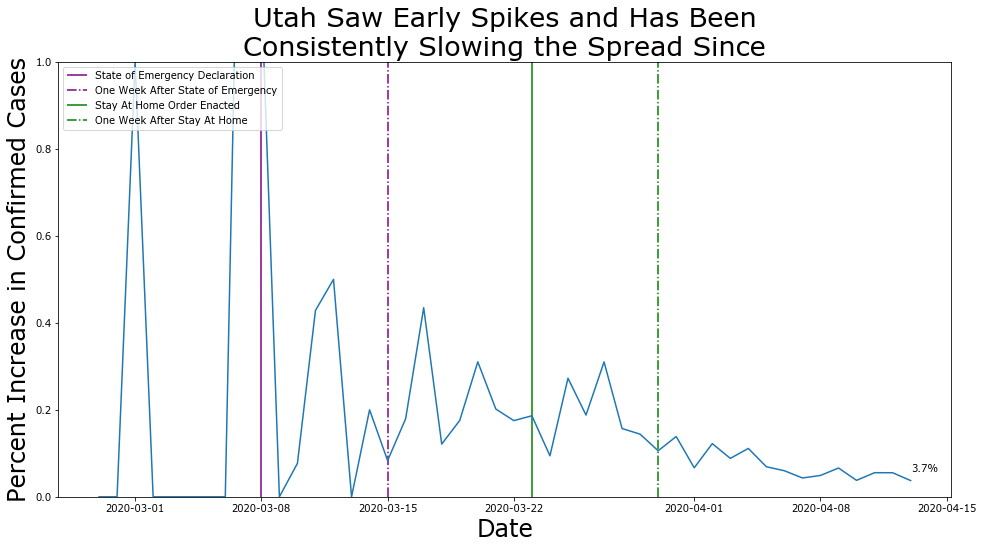

In [31]:
plt.figure(figsize=(16,8))
plt.title("Utah Saw Early Spikes and Has Been\nConsistently Slowing the Spread Since", size=27)

plt.xlabel('Date', size=24)
plt.ylabel('Percent Increase in Confirmed Cases', size=24)

# https://www.oregon.gov/OEM/Pages/default.aspx
plt.vlines(x=dt.date(2020, 3, 8), ymin=0, ymax=1, linestyles='solid', color='purple', label='State of Emergency Declaration')
plt.vlines(x=dt.date(2020, 3, 15), ymin=0, ymax=1, linestyle='dashdot', color='purple', label='One Week After State of Emergency')

# https://govstatus.egov.com/or-covid-19
plt.vlines(x=dt.date(2020, 3, 23), ymin=0, ymax=1, linestyles='solid', color='green', label='Stay At Home Order Enacted')
plt.vlines(x=dt.date(2020, 3, 30), ymin=0, ymax=1, linestyle='dashdot', color='green', label='One Week After Stay At Home')

# thousand_case_milestone(oregon_data)

most_recent(oregon_data)

plt.ylim(ymin=0, ymax=1)

plt.plot(oregon_data.percent_change)

plt.legend(loc='upper left');

### Florida

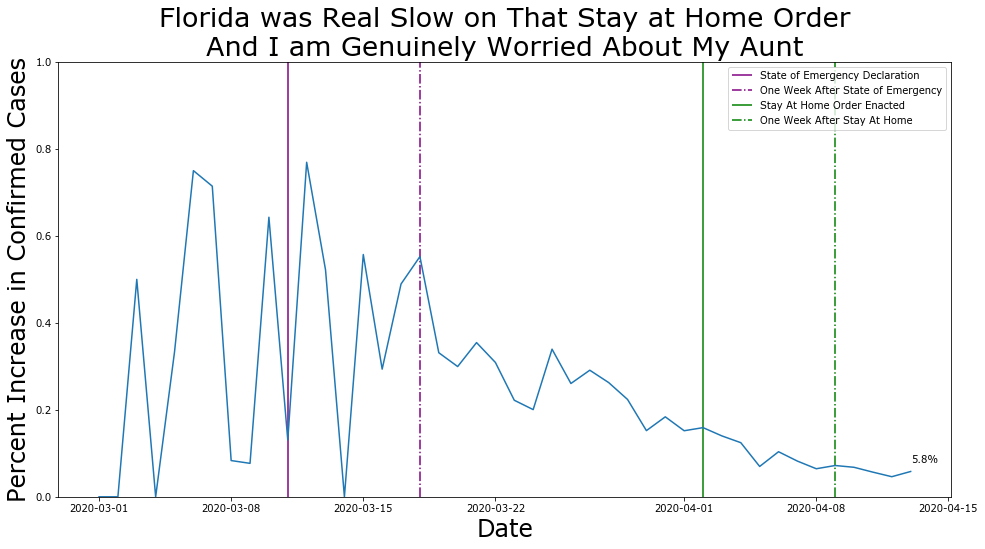

In [32]:
plt.figure(figsize=(16,8))
plt.title("Florida was Real Slow on That Stay at Home Order\nAnd I am Genuinely Worried About My Aunt", size=27)

plt.xlabel('Date', size=24)
plt.ylabel('Percent Increase in Confirmed Cases', size=24)

# https://www.insurancejournal.com/news/southeast/2020/03/11/560811.htm
plt.vlines(x=dt.date(2020, 3, 11), ymin=0, ymax=1, linestyles='solid', color='purple', label='State of Emergency Declaration')
plt.vlines(x=dt.date(2020, 3, 18), ymin=0, ymax=1, linestyle='dashdot', color='purple', label='One Week After State of Emergency')

# https://www.reuters.com/video/watch/idOVC7O1IOV
plt.vlines(x=dt.date(2020, 4, 2), ymin=0, ymax=1, linestyles='solid', color='green', label='Stay At Home Order Enacted')
plt.vlines(x=dt.date(2020, 4, 9), ymin=0, ymax=1, linestyle='dashdot', color='green', label='One Week After Stay At Home')

# thousand_case_milestone(florida_data)

most_recent(florida_data)

plt.ylim(ymin=0, ymax=1)

plt.plot(florida_data.percent_change)

plt.legend();

### New York

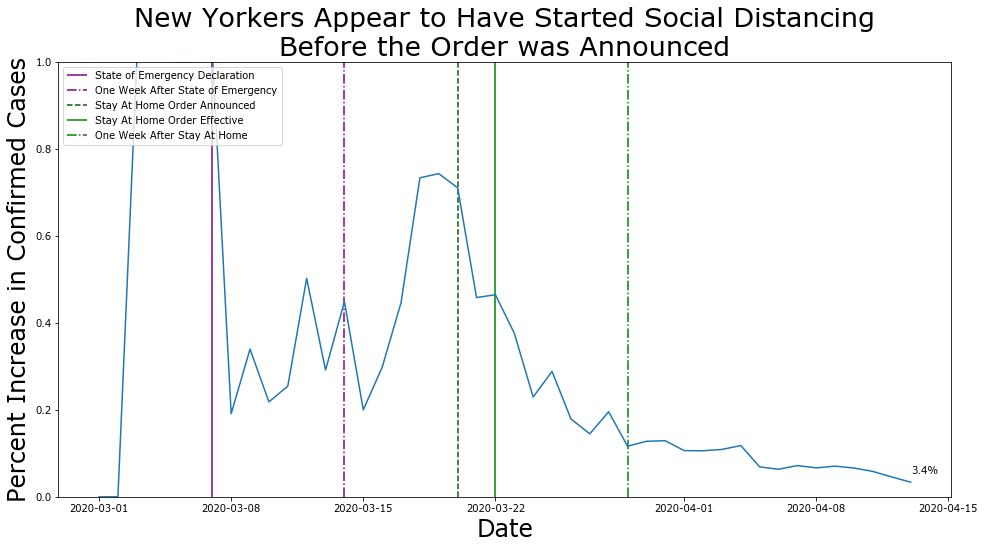

In [88]:
plt.figure(figsize=(16,8))
plt.title("New Yorkers Appear to Have Started Social Distancing\nBefore the Order was Announced", size=27)

plt.xlabel('Date', size=24)
plt.ylabel('Percent Increase in Confirmed Cases', size=24)

# https://www.cnbc.com/2020/03/07/new-york-governor-andrew-cuomo-declares-state-of-emergency-over-coronavirus-outbreak.html
plt.vlines(x=dt.date(2020, 3, 7), ymin=0, ymax=1, linestyles='solid', color='purple', label='State of Emergency Declaration')
plt.vlines(x=dt.date(2020, 3, 14), ymin=0, ymax=1, linestyle='dashdot', color='purple', label='One Week After State of Emergency')

# https://www.npr.org/sections/coronavirus-live-updates/2020/03/20/818952589/coronavirus-n-y-gov-cuomo-says-100-of-workforce-must-stay-home
plt.vlines(x=dt.date(2020, 3, 20), ymin=0, ymax=1, linestyle='dashed', color='darkgreen', label='Stay At Home Order Announced')
plt.vlines(x=dt.date(2020, 3, 22), ymin=0, ymax=1, linestyles='solid', color='green', label='Stay At Home Order Effective')
plt.vlines(x=dt.date(2020, 3, 29), ymin=0, ymax=1, linestyle='dashdot', color='green', label='One Week After Stay At Home')

# thousand_case_milestone(new_york_data)

most_recent(new_york_data)

plt.ylim(ymin=0, ymax=1)

plt.plot(new_york_data.percent_change)

plt.legend(loc='upper left');

### Rhode Island

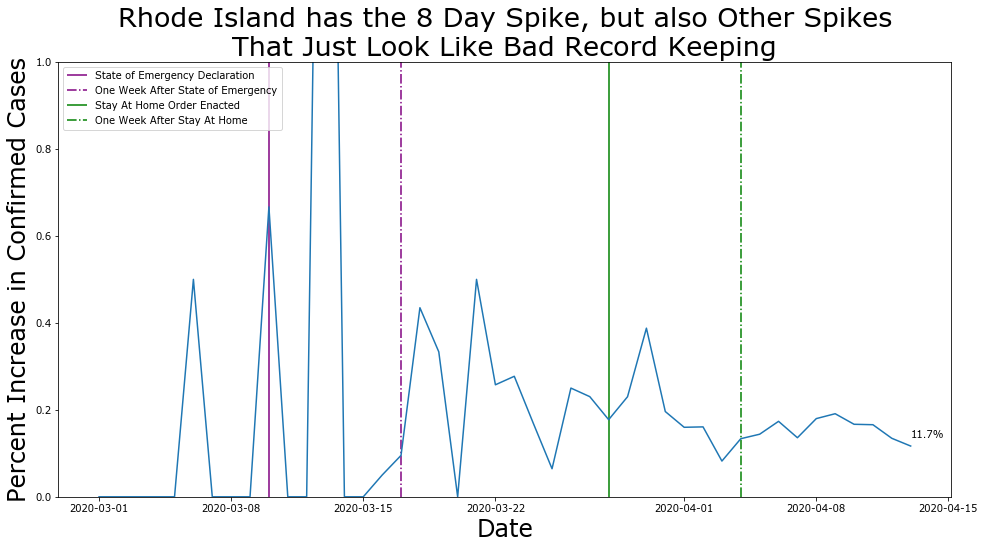

In [34]:
plt.figure(figsize=(16,8))
plt.title("Rhode Island has the 8 Day Spike, but also Other Spikes\nThat Just Look Like Bad Record Keeping", size=27)

plt.xlabel('Date', size=24)
plt.ylabel('Percent Increase in Confirmed Cases', size=24)

# https://www.southcoasttoday.com/news/20200310/gov-declares-state-of-emergency-in-ri-over-coronavirus
plt.vlines(x=dt.date(2020, 3, 10), ymin=0, ymax=1, linestyles='solid', color='purple', label='State of Emergency Declaration')
plt.vlines(x=dt.date(2020, 3, 17), ymin=0, ymax=1, linestyle='dashdot', color='purple', label='One Week After State of Emergency')

# https://www.wgbh.org/news/local-news/2020/03/28/rhode-island-governor-issues-strict-stay-at-home-order
plt.vlines(x=dt.date(2020, 3, 28), ymin=0, ymax=1, linestyles='solid', color='green', label='Stay At Home Order Enacted')
plt.vlines(x=dt.date(2020, 4, 4), ymin=0, ymax=1, linestyle='dashdot', color='green', label='One Week After Stay At Home')

# thousand_case_milestone(rhode_island_data)

most_recent(rhode_island_data)

plt.ylim(ymin=0, ymax=1)

plt.plot(rhode_island_data.percent_change)

plt.legend(loc='upper left');

### Georgia

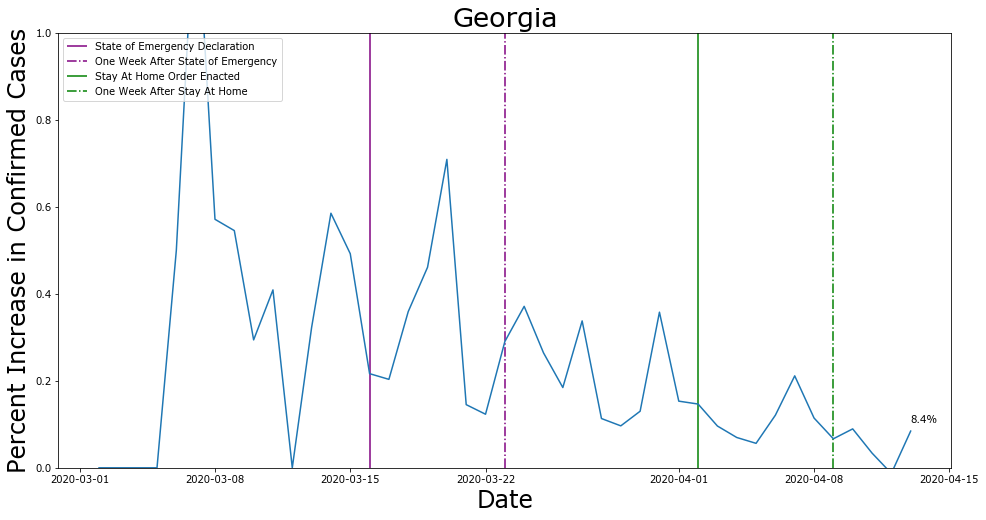

In [35]:
plt.figure(figsize=(16,8))
plt.title("Georgia", size=27)

plt.xlabel('Date', size=24)
plt.ylabel('Percent Increase in Confirmed Cases', size=24)

# https://gov.georgia.gov/press-releases/2020-03-16/kemp-declares-public-health-state-emergency
plt.vlines(x=dt.date(2020, 3, 16), ymin=0, ymax=1, linestyles='solid', color='purple', label='State of Emergency Declaration')
plt.vlines(x=dt.date(2020, 3, 23), ymin=0, ymax=1, linestyle='dashdot', color='purple', label='One Week After State of Emergency')

# https://www.11alive.com/article/news/health/coronavirus/georgia-governor-kemp-stay-at-home-shelter-in-place-order-schools-closed/85-66acfee4-2426-43cf-b9da-a7d1714e5445
plt.vlines(x=dt.date(2020, 4, 2), ymin=0, ymax=1, linestyles='solid', color='green', label='Stay At Home Order Enacted')
plt.vlines(x=dt.date(2020, 4, 9), ymin=0, ymax=1, linestyle='dashdot', color='green', label='One Week After Stay At Home')

# thousand_case_milestone(georgia_data)

most_recent(georgia_data)

plt.ylim(ymin=0, ymax=1)

plt.plot(georgia_data.percent_change)

plt.legend(loc='upper left');

### New Hampshire

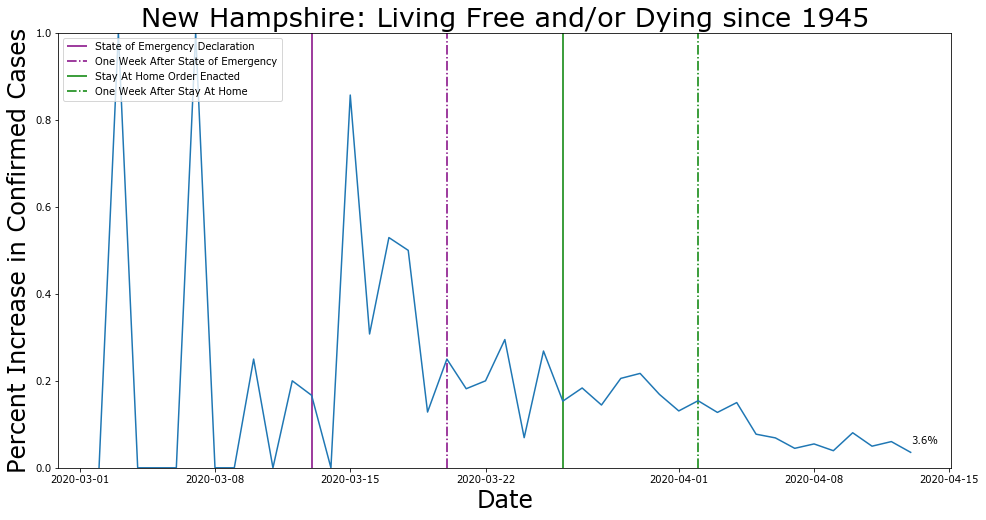

In [36]:
plt.figure(figsize=(16,8))
plt.title("New Hampshire: Living Free and/or Dying since 1945", size=27)

plt.xlabel('Date', size=24)
plt.ylabel('Percent Increase in Confirmed Cases', size=24)

# https://www.governor.nh.gov/news-media/emergency-orders/
plt.vlines(x=dt.date(2020, 3, 13), ymin=0, ymax=1, linestyles='solid', color='purple', label='State of Emergency Declaration')
plt.vlines(x=dt.date(2020, 3, 20), ymin=0, ymax=1, linestyle='dashdot', color='purple', label='One Week After State of Emergency')

# https://www.nhpr.org/post/new-hampshire-s-stay-home-order-what-does-it-mean#stream/0
plt.vlines(x=dt.date(2020, 3, 26), ymin=0, ymax=1, linestyles='solid', color='green', label='Stay At Home Order Enacted')
plt.vlines(x=dt.date(2020, 4, 2), ymin=0, ymax=1, linestyle='dashdot', color='green', label='One Week After Stay At Home')

# thousand_case_milestone(new_hampshire_data)

most_recent(new_hampshire_data)

plt.ylim(ymin=0, ymax=1)

plt.plot(new_hampshire_data.percent_change)

plt.legend(loc='upper left');

### North Carolina

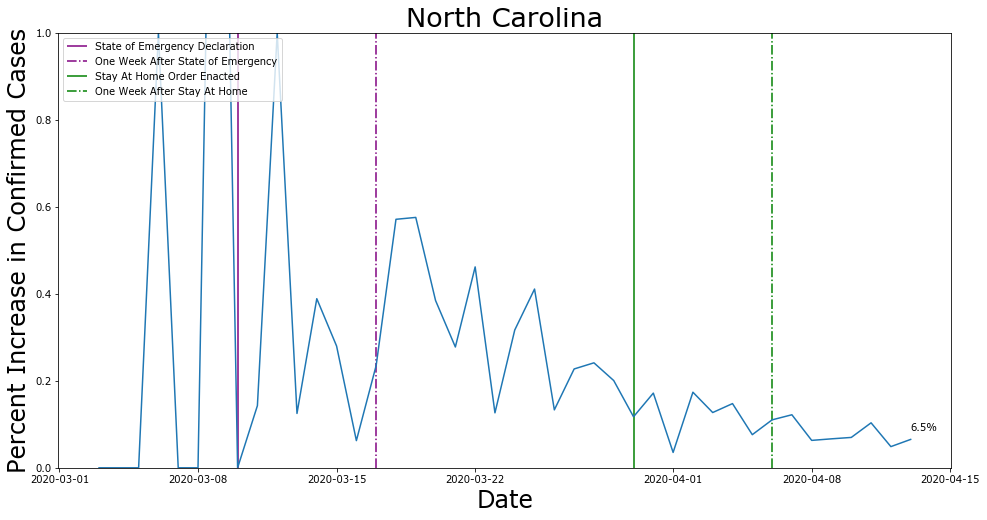

In [37]:
plt.figure(figsize=(16,8))
plt.title("North Carolina", size=27)

plt.xlabel('Date', size=24)
plt.ylabel('Percent Increase in Confirmed Cases', size=24)

# https://governor.nc.gov/news/governor-cooper-declares-state-emergency-respond-coronavirus-covid-19
plt.vlines(x=dt.date(2020, 3, 10), ymin=0, ymax=1, linestyles='solid', color='purple', label='State of Emergency Declaration')
plt.vlines(x=dt.date(2020, 3, 17), ymin=0, ymax=1, linestyle='dashdot', color='purple', label='One Week After State of Emergency')

# https://www.newsobserver.com/news/coronavirus/article241622406.html
plt.vlines(x=dt.date(2020, 3, 30), ymin=0, ymax=1, linestyles='solid', color='green', label='Stay At Home Order Enacted')
plt.vlines(x=dt.date(2020, 4, 6), ymin=0, ymax=1, linestyle='dashdot', color='green', label='One Week After Stay At Home')

# thousand_case_milestone(north_carolina_data)

most_recent(north_carolina_data)

plt.ylim(ymin=0, ymax=1)

plt.plot(north_carolina_data.percent_change)

plt.legend(loc='upper left');

### New Jersey

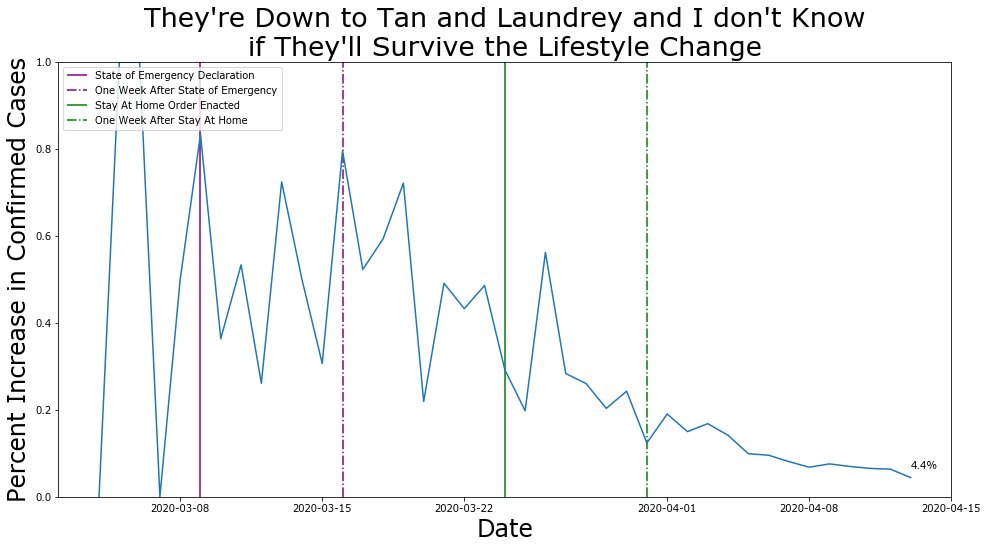

In [38]:
plt.figure(figsize=(16,8))
plt.title("They're Down to Tan and Laundrey and I don't Know\nif They'll Survive the Lifestyle Change", size=27)

plt.xlabel('Date', size=24)
plt.ylabel('Percent Increase in Confirmed Cases', size=24)

# https://www.nj.gov/governor/news/news/562020/20200309b.shtml
plt.vlines(x=dt.date(2020, 3, 9), ymin=0, ymax=1, linestyles='solid', color='purple', label='State of Emergency Declaration')
plt.vlines(x=dt.date(2020, 3, 16), ymin=0, ymax=1, linestyle='dashdot', color='purple', label='One Week After State of Emergency')

# https://covid19.nj.gov/faqs/nj-information/general-public/governor-murphy-announces-statewide-stay-at-home-order-closure-of-all-non-essential-retail-businesses
plt.vlines(x=dt.date(2020, 3, 24), ymin=0, ymax=1, linestyles='solid', color='green', label='Stay At Home Order Enacted')
plt.vlines(x=dt.date(2020, 3, 31), ymin=0, ymax=1, linestyle='dashdot', color='green', label='One Week After Stay At Home')

# thousand_case_milestone(new_jersey_data)

most_recent(new_jersey_data)

plt.ylim(ymin=0, ymax=1)

plt.plot(new_jersey_data.percent_change)

plt.legend(loc='upper left');

### Colorado

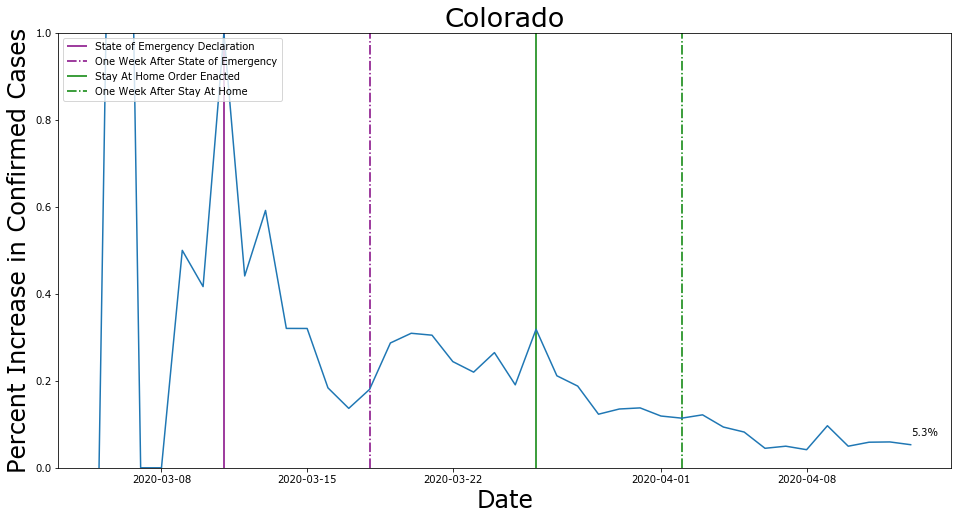

In [39]:
plt.figure(figsize=(16,8))
plt.title("Colorado", size=27)

plt.xlabel('Date', size=24)
plt.ylabel('Percent Increase in Confirmed Cases', size=24)

# https://www.5280.com/2020/03/what-does-a-state-of-emergency-really-mean-for-colorado/
plt.vlines(x=dt.date(2020, 3, 11), ymin=0, ymax=1, linestyles='solid', color='purple', label='State of Emergency Declaration')
plt.vlines(x=dt.date(2020, 3, 18), ymin=0, ymax=1, linestyle='dashdot', color='purple', label='One Week After State of Emergency')

# https://www.cpr.org/2020/03/25/polis-announces-statewide-stay-at-home-order/
plt.vlines(x=dt.date(2020, 3, 26), ymin=0, ymax=1, linestyles='solid', color='green', label='Stay At Home Order Enacted')
plt.vlines(x=dt.date(2020, 4, 2), ymin=0, ymax=1, linestyle='dashdot', color='green', label='One Week After Stay At Home')

# thousand_case_milestone(colorado_data)

most_recent(colorado_data)

plt.ylim(ymin=0, ymax=1)

plt.plot(colorado_data.percent_change)

plt.legend(loc='upper left');

### Maryland

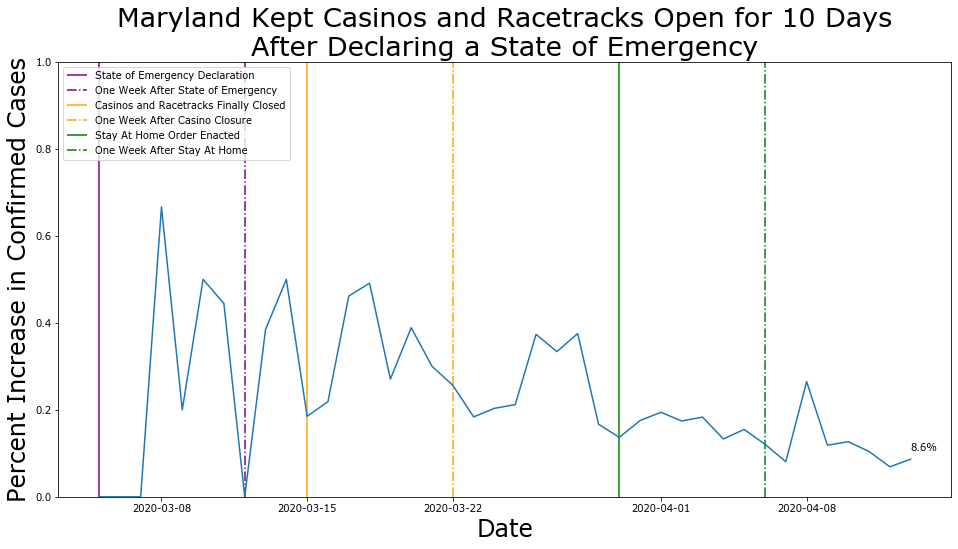

In [40]:
plt.figure(figsize=(16,8))
plt.title("Maryland Kept Casinos and Racetracks Open for 10 Days\nAfter Declaring a State of Emergency", size=27)

plt.xlabel('Date', size=24)
plt.ylabel('Percent Increase in Confirmed Cases', size=24)

# https://governor.maryland.gov/2020/03/05/governor-larry-hogan-declares-state-of-emergency-expands-statewide-response-to-novel-coronavirus/
plt.vlines(x=dt.date(2020, 3, 5), ymin=0, ymax=1, linestyles='solid', color='purple', label='State of Emergency Declaration')
plt.vlines(x=dt.date(2020, 3, 12), ymin=0, ymax=1, linestyle='dashdot', color='purple', label='One Week After State of Emergency')

# https://governor.maryland.gov/2020/03/15/governor-hogan-issues-emergency-order-to-close-all-maryland-casinos-racetracks-and-simulcast-betting-facilities-to-prevent-the-spread-of-covid-19/
plt.vlines(x=dt.date(2020, 3, 15), ymin=0, ymax=1, linestyle='solid', color='orange', label='Casinos and Racetracks Finally Closed')
plt.vlines(x=dt.date(2020, 3, 22), ymin=0, ymax=1, linestyle='dashdot', color='orange', label='One Week After Casino Closure')

# https://governor.maryland.gov/2020/03/30/as-covid-19-crisis-escalates-in-capital-region-governor-hogan-issues-stay-at-home-order-effective-tonight/
plt.vlines(x=dt.date(2020, 3, 30), ymin=0, ymax=1, linestyles='solid', color='green', label='Stay At Home Order Enacted')
plt.vlines(x=dt.date(2020, 4, 6), ymin=0, ymax=1, linestyle='dashdot', color='green', label='One Week After Stay At Home')

# thousand_case_milestone(maryland_data)

most_recent(maryland_data)

plt.ylim(ymin=0, ymax=1)

plt.plot(maryland_data.percent_change)

plt.legend(loc='upper left');

### Nevada

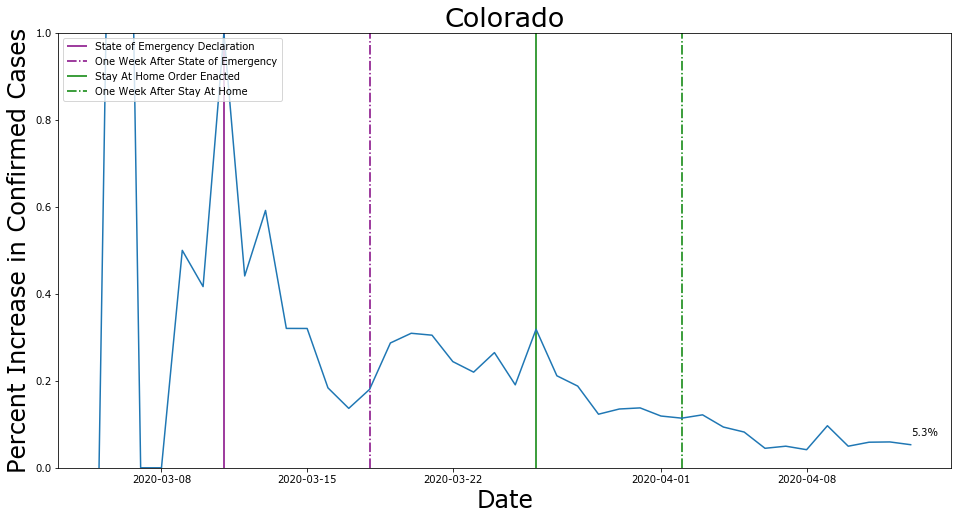

In [56]:
plt.figure(figsize=(16,8))
plt.title("Colorado", size=27)

plt.xlabel('Date', size=24)
plt.ylabel('Percent Increase in Confirmed Cases', size=24)

# https://www.5280.com/2020/03/what-does-a-state-of-emergency-really-mean-for-colorado/
plt.vlines(x=dt.date(2020, 3, 11), ymin=0, ymax=1, linestyles='solid', color='purple', label='State of Emergency Declaration')
plt.vlines(x=dt.date(2020, 3, 18), ymin=0, ymax=1, linestyle='dashdot', color='purple', label='One Week After State of Emergency')

# https://www.cpr.org/2020/03/25/polis-announces-statewide-stay-at-home-order/
plt.vlines(x=dt.date(2020, 3, 26), ymin=0, ymax=1, linestyles='solid', color='green', label='Stay At Home Order Enacted')
plt.vlines(x=dt.date(2020, 4, 2), ymin=0, ymax=1, linestyle='dashdot', color='green', label='One Week After Stay At Home')

# thousand_case_milestone(colorado_data)

most_recent(colorado_data)

plt.ylim(ymin=0, ymax=1)

plt.plot(colorado_data.percent_change)

plt.legend(loc='upper left');

### Tennessee

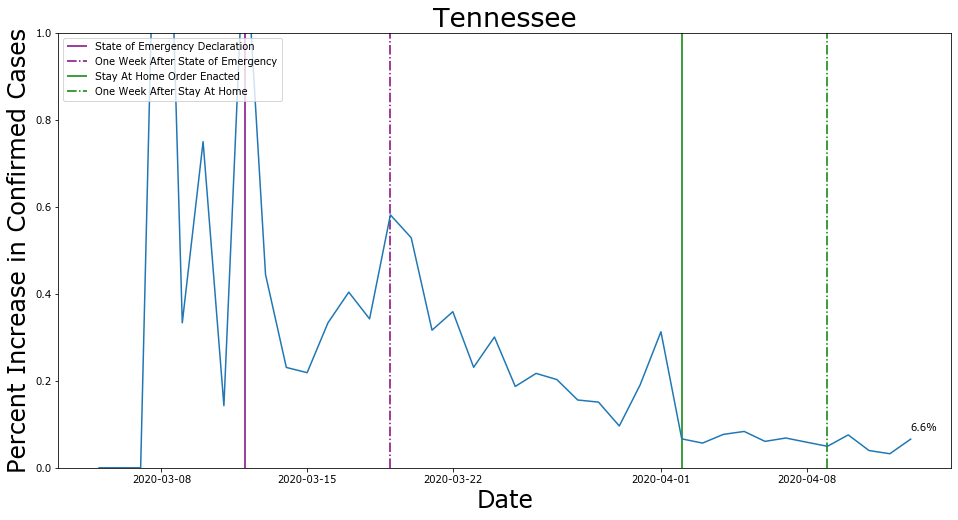

In [52]:
plt.figure(figsize=(16,8))
plt.title("Tennessee", size=27)

plt.xlabel('Date', size=24)
plt.ylabel('Percent Increase in Confirmed Cases', size=24)

# https://www.tn.gov/governor/news/2020/3/12/gov--bill-lee-issues-executive-order-declaring-state-of-emergency-in-response-to-covid-19.html
plt.vlines(x=dt.date(2020, 3, 12), ymin=0, ymax=1, linestyles='solid', color='purple', label='State of Emergency Declaration')
plt.vlines(x=dt.date(2020, 3, 19), ymin=0, ymax=1, linestyle='dashdot', color='purple', label='One Week After State of Emergency')

# https://thehill.com/homenews/state-watch/490886-tennessee-governor-issues-stay-at-home-order
plt.vlines(x=dt.date(2020, 4, 2), ymin=0, ymax=1, linestyles='solid', color='green', label='Stay At Home Order Enacted')
plt.vlines(x=dt.date(2020, 4, 9), ymin=0, ymax=1, linestyle='dashdot', color='green', label='One Week After Stay At Home')

# thousand_case_milestone(tennessee_data)

most_recent(tennessee_data)

plt.ylim(ymin=0, ymax=1)

plt.plot(tennessee_data.percent_change)

plt.legend(loc='upper left');

### Hawaii

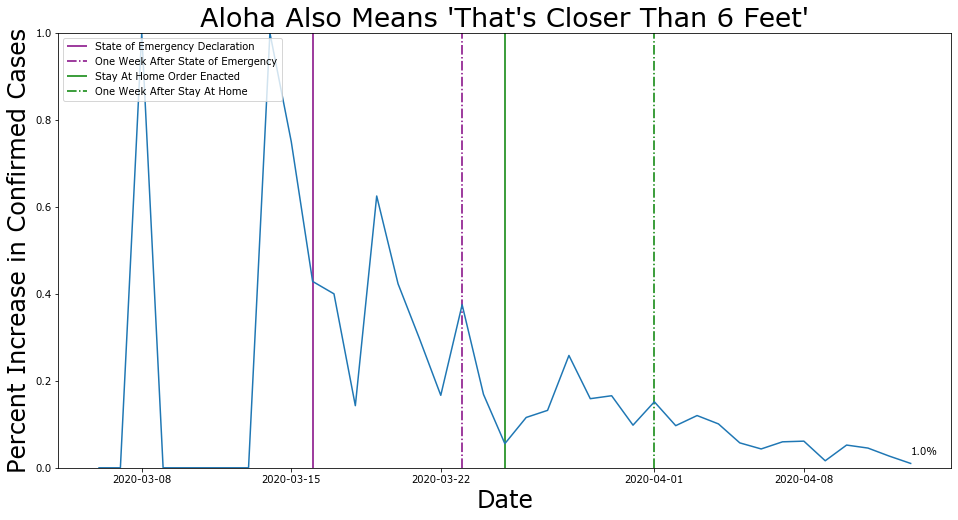

In [57]:
plt.figure(figsize=(16,8))
plt.title("Aloha Also Means 'That's Closer Than 6 Feet'", size=27)

plt.xlabel('Date', size=24)
plt.ylabel('Percent Increase in Confirmed Cases', size=24)

# https://governor.hawaii.gov/emergency-proclamations/
plt.vlines(x=dt.date(2020, 3, 16), ymin=0, ymax=1, linestyles='solid', color='purple', label='State of Emergency Declaration')
plt.vlines(x=dt.date(2020, 3, 23), ymin=0, ymax=1, linestyle='dashdot', color='purple', label='One Week After State of Emergency')

# https://governor.hawaii.gov/newsroom/latest-news/office-of-the-governor-news-release-governor-ige-issues-statewide-order-to-stay-at-home-work-from-home-to-fight-covid-19/
plt.vlines(x=dt.date(2020, 3, 25), ymin=0, ymax=1, linestyles='solid', color='green', label='Stay At Home Order Enacted')
plt.vlines(x=dt.date(2020, 4, 1), ymin=0, ymax=1, linestyle='dashdot', color='green', label='One Week After Stay At Home')

# thousand_case_milestone(hawaii_data)

most_recent(hawaii_data)

plt.ylim(ymin=0, ymax=1)

plt.plot(hawaii_data.percent_change)

plt.legend(loc='upper left');

### Indiana

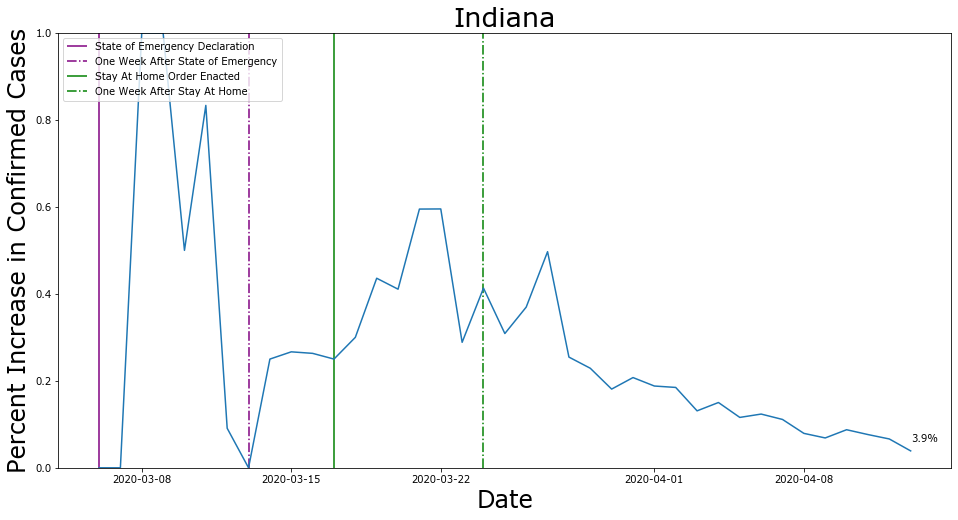

In [59]:
plt.figure(figsize=(16,8))
plt.title("Indiana", size=27)

plt.xlabel('Date', size=24)
plt.ylabel('Percent Increase in Confirmed Cases', size=24)

# https://www.indystar.com/story/news/health/2020/03/06/coronavirus-indiana-cases/4973737002/
plt.vlines(x=dt.date(2020, 3, 6), ymin=0, ymax=1, linestyles='solid', color='purple', label='State of Emergency Declaration')
plt.vlines(x=dt.date(2020, 3, 13), ymin=0, ymax=1, linestyle='dashdot', color='purple', label='One Week After State of Emergency')

# https://fox59.com/news/indiana-governor-signs-executive-order-on-covid-19-response/
plt.vlines(x=dt.date(2020, 3, 17), ymin=0, ymax=1, linestyles='solid', color='green', label='Stay At Home Order Enacted')
plt.vlines(x=dt.date(2020, 3, 24), ymin=0, ymax=1, linestyle='dashdot', color='green', label='One Week After Stay At Home')

# thousand_case_milestone(indiana_data)

most_recent(indiana_data)

plt.ylim(ymin=0, ymax=1)

plt.plot(indiana_data.percent_change)

plt.legend(loc='upper left');

### Kentucky

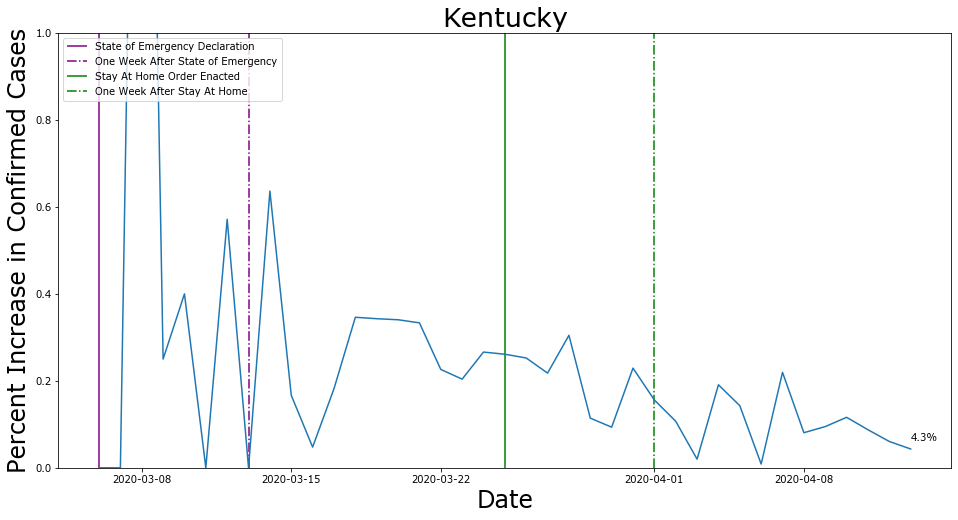

In [61]:
plt.figure(figsize=(16,8))
plt.title("Kentucky", size=27)

plt.xlabel('Date', size=24)
plt.ylabel('Percent Increase in Confirmed Cases', size=24)

# https://kentucky.gov/Pages/Activity-stream.aspx?n=GovernorBeshear&prId=77
plt.vlines(x=dt.date(2020, 3, 6), ymin=0, ymax=1, linestyles='solid', color='purple', label='State of Emergency Declaration')
plt.vlines(x=dt.date(2020, 3, 13), ymin=0, ymax=1, linestyle='dashdot', color='purple', label='One Week After State of Emergency')

# https://governor.ky.gov/attachments/20200325_Executive-Order_2020-257_Healthy-at-Home.pdf
plt.vlines(x=dt.date(2020, 3, 25), ymin=0, ymax=1, linestyles='solid', color='green', label='Stay At Home Order Enacted')
plt.vlines(x=dt.date(2020, 4, 1), ymin=0, ymax=1, linestyle='dashdot', color='green', label='One Week After Stay At Home')

# thousand_case_milestone(kentucky_data)

most_recent(kentucky_data)

plt.ylim(ymin=0, ymax=1)

plt.plot(kentucky_data.percent_change)

plt.legend(loc='upper left');

### Minnesota

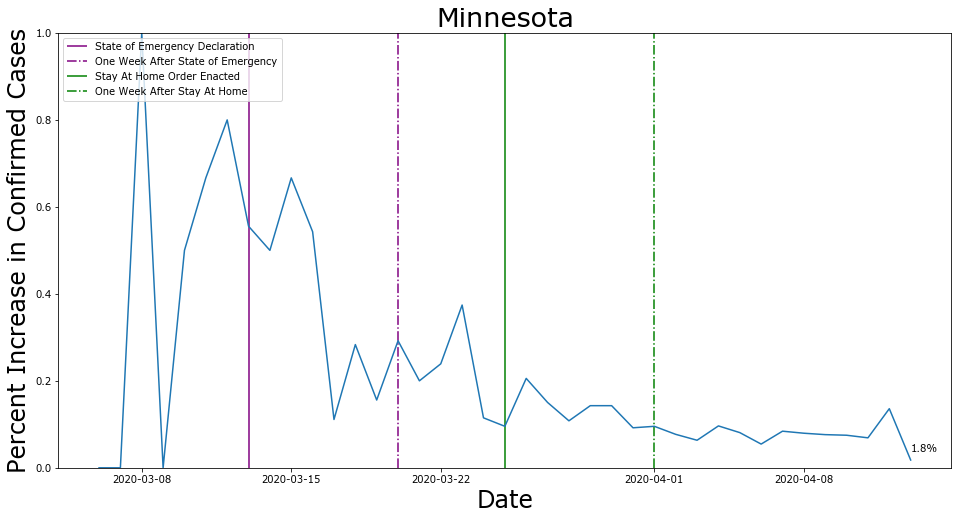

In [63]:
plt.figure(figsize=(16,8))
plt.title("Minnesota", size=27)

plt.xlabel('Date', size=24)
plt.ylabel('Percent Increase in Confirmed Cases', size=24)

# https://mn.gov/governor/assets/EO%2020-01_tcm1055-422957.pdf
plt.vlines(x=dt.date(2020, 3, 13), ymin=0, ymax=1, linestyles='solid', color='purple', label='State of Emergency Declaration')
plt.vlines(x=dt.date(2020, 3, 20), ymin=0, ymax=1, linestyle='dashdot', color='purple', label='One Week After State of Emergency')

# https://www.leg.state.mn.us/archive/execorders/20-20.pdf
plt.vlines(x=dt.date(2020, 3, 25), ymin=0, ymax=1, linestyles='solid', color='green', label='Stay At Home Order Enacted')
plt.vlines(x=dt.date(2020, 4, 1), ymin=0, ymax=1, linestyle='dashdot', color='green', label='One Week After Stay At Home')

# thousand_case_milestone(minnesota_data)

most_recent(minnesota_data)

plt.ylim(ymin=0, ymax=1)

plt.plot(minnesota_data.percent_change)

plt.legend(loc='upper left');

### Oklahoma

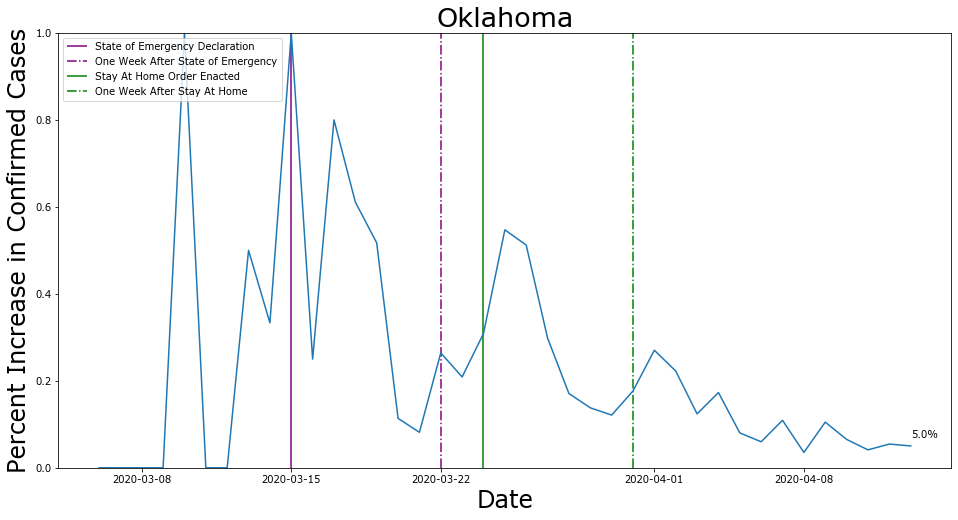

In [65]:
plt.figure(figsize=(16,8))
plt.title("Oklahoma", size=27)

plt.xlabel('Date', size=24)
plt.ylabel('Percent Increase in Confirmed Cases', size=24)

# https://www.news9.com/story/41897477/gov-stitt-declares-state-of-emergency-for-all-77-oklahoma-counties
plt.vlines(x=dt.date(2020, 3, 15), ymin=0, ymax=1, linestyles='solid', color='purple', label='State of Emergency Declaration')
plt.vlines(x=dt.date(2020, 3, 22), ymin=0, ymax=1, linestyle='dashdot', color='purple', label='One Week After State of Emergency')

# https://ktul.com/news/local/oklahoma-governor-issues-safer-at-home-order
plt.vlines(x=dt.date(2020, 3, 24), ymin=0, ymax=1, linestyles='solid', color='green', label='Stay At Home Order Enacted')
plt.vlines(x=dt.date(2020, 3, 31), ymin=0, ymax=1, linestyle='dashdot', color='green', label='One Week After Stay At Home')

# thousand_case_milestone(oklahoma_data)

most_recent(oklahoma_data)

plt.ylim(ymin=0, ymax=1)

plt.plot(oklahoma_data.percent_change)

plt.legend(loc='upper left');

### Pennsylvania

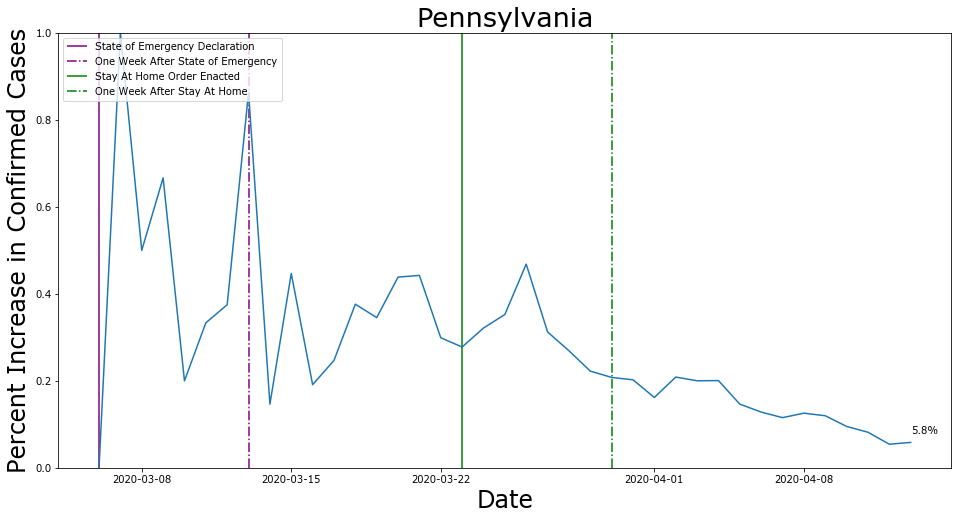

In [66]:
plt.figure(figsize=(16,8))
plt.title("Pennsylvania", size=27)

plt.xlabel('Date', size=24)
plt.ylabel('Percent Increase in Confirmed Cases', size=24)

# https://www.governor.pa.gov/newsroom/gov-wolf-signs-covid-19-disaster-declaration-to-provide-increased-support-for-state-response/
plt.vlines(x=dt.date(2020, 3, 6), ymin=0, ymax=1, linestyles='solid', color='purple', label='State of Emergency Declaration')
plt.vlines(x=dt.date(2020, 3, 13), ymin=0, ymax=1, linestyle='dashdot', color='purple', label='One Week After State of Emergency')

# https://www.governor.pa.gov/newsroom/governor-wolf-and-health-secretary-issue-stay-at-home-orders-to-7-counties-to-mitigate-spread-of-covid-19/
plt.vlines(x=dt.date(2020, 3, 23), ymin=0, ymax=1, linestyles='solid', color='green', label='Stay At Home Order Enacted')
plt.vlines(x=dt.date(2020, 3, 30), ymin=0, ymax=1, linestyle='dashdot', color='green', label='One Week After Stay At Home')

# thousand_case_milestone(pennsylvania_data)

most_recent(pennsylvania_data)

plt.ylim(ymin=0, ymax=1)

plt.plot(pennsylvania_data.percent_change)

plt.legend(loc='upper left');

### South Carolina

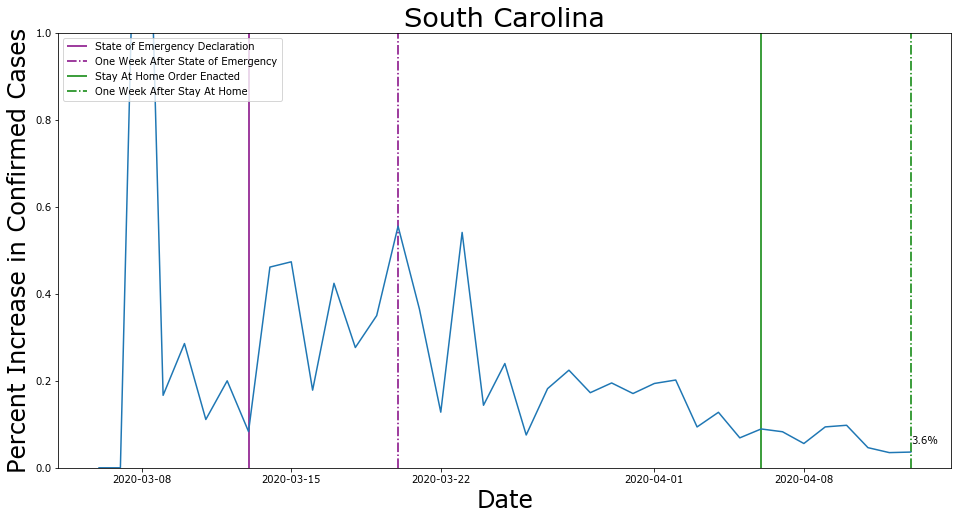

In [67]:
plt.figure(figsize=(16,8))
plt.title("South Carolina", size=27)

plt.xlabel('Date', size=24)
plt.ylabel('Percent Increase in Confirmed Cases', size=24)

# https://governor.sc.gov/news/2020-03/gov-henry-mcmaster-declare-state-emergency-order-lancaster-kershaw-county-schools
plt.vlines(x=dt.date(2020, 3, 13), ymin=0, ymax=1, linestyles='solid', color='purple', label='State of Emergency Declaration')
plt.vlines(x=dt.date(2020, 3, 20), ymin=0, ymax=1, linestyle='dashdot', color='purple', label='One Week After State of Emergency')

# https://www.cnbc.com/2020/04/06/south-carolina-orders-residents-to-stay-at-home-during-coronavirus-pandemic.html
plt.vlines(x=dt.date(2020, 4, 6), ymin=0, ymax=1, linestyles='solid', color='green', label='Stay At Home Order Enacted')
plt.vlines(x=dt.date(2020, 4, 13), ymin=0, ymax=1, linestyle='dashdot', color='green', label='One Week After Stay At Home')

# thousand_case_milestone(south_carolina_data)

most_recent(south_carolina_data)

plt.ylim(ymin=0, ymax=1)

plt.plot(south_carolina_data.percent_change)

plt.legend(loc='upper left');

### District of Columbia

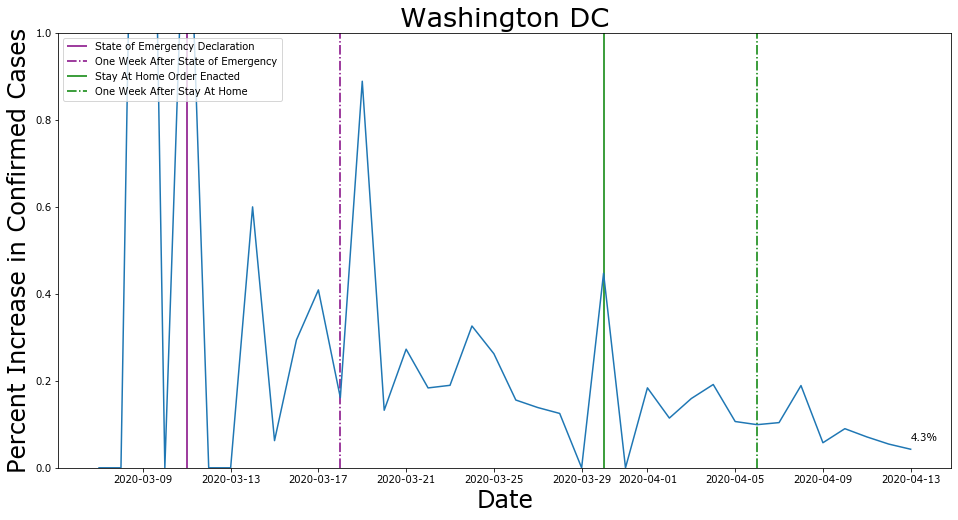

In [69]:
plt.figure(figsize=(16,8))
plt.title("Washington DC", size=27)

plt.xlabel('Date', size=24)
plt.ylabel('Percent Increase in Confirmed Cases', size=24)

# https://www.cnn.com/2020/03/11/politics/washington-dc-state-of-emergency-coronavirus/index.html
plt.vlines(x=dt.date(2020, 3, 11), ymin=0, ymax=1, linestyles='solid', color='purple', label='State of Emergency Declaration')
plt.vlines(x=dt.date(2020, 3, 18), ymin=0, ymax=1, linestyle='dashdot', color='purple', label='One Week After State of Emergency')

# https://mayor.dc.gov/release/mayor-bowser-issues-stay-home-order
plt.vlines(x=dt.date(2020, 3, 30), ymin=0, ymax=1, linestyles='solid', color='green', label='Stay At Home Order Enacted')
plt.vlines(x=dt.date(2020, 4, 6), ymin=0, ymax=1, linestyle='dashdot', color='green', label='One Week After Stay At Home')

# thousand_case_milestone(dc_data)

most_recent(dc_data)

plt.ylim(ymin=0, ymax=1)

plt.plot(dc_data.percent_change)

plt.legend(loc='upper left');

### Kansas

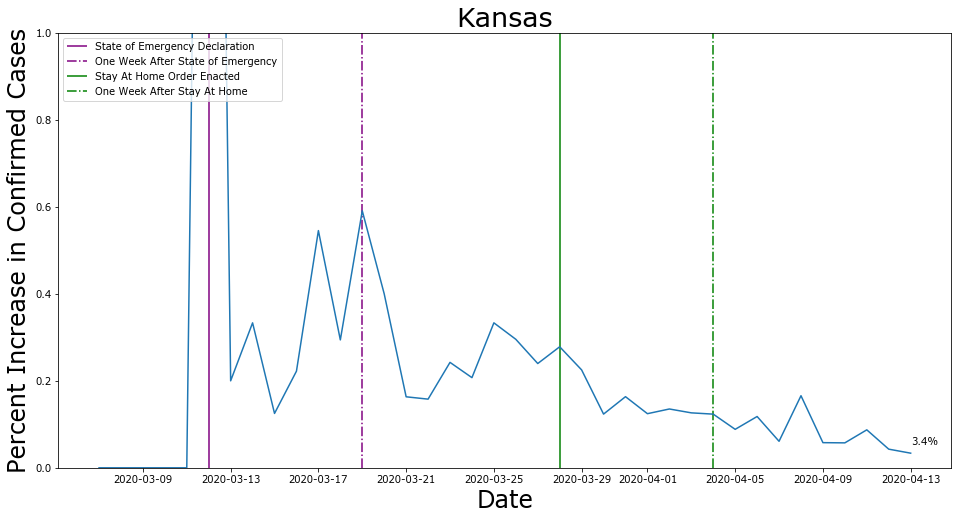

In [71]:
plt.figure(figsize=(16,8))
plt.title("Kansas", size=27)

plt.xlabel('Date', size=24)
plt.ylabel('Percent Increase in Confirmed Cases', size=24)

# https://governor.kansas.gov/governor-issues-emergency-declaration-for-covid-19/
plt.vlines(x=dt.date(2020, 3, 12), ymin=0, ymax=1, linestyles='solid', color='purple', label='State of Emergency Declaration')
plt.vlines(x=dt.date(2020, 3, 19), ymin=0, ymax=1, linestyle='dashdot', color='purple', label='One Week After State of Emergency')

# https://governor.kansas.gov/governor-kelly-issues-temporary-statewide-stay-home-order-in-ongoing-effort-to-combat-covid-19/
plt.vlines(x=dt.date(2020, 3, 28), ymin=0, ymax=1, linestyles='solid', color='green', label='Stay At Home Order Enacted')
plt.vlines(x=dt.date(2020, 4, 4), ymin=0, ymax=1, linestyle='dashdot', color='green', label='One Week After Stay At Home')

# thousand_case_milestone(kansas_data)

most_recent(kansas_data)

plt.ylim(ymin=0, ymax=1)

plt.plot(kansas_data.percent_change)

plt.legend(loc='upper left');

### Missouri

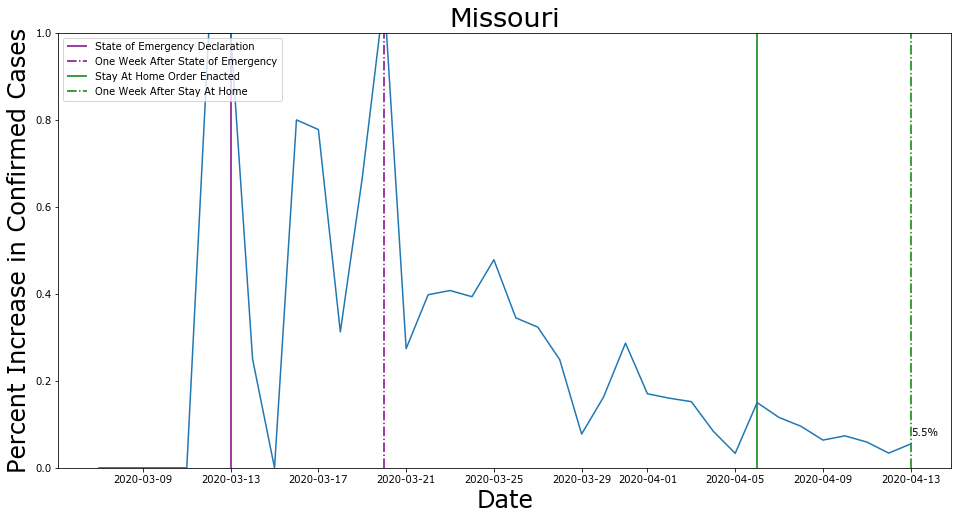

In [72]:
plt.figure(figsize=(16,8))
plt.title("Missouri", size=27)

plt.xlabel('Date', size=24)
plt.ylabel('Percent Increase in Confirmed Cases', size=24)

# https://governor.mo.gov/press-releases/archive/governor-parson-signs-executive-order-20-02-declaring-state-emergency
plt.vlines(x=dt.date(2020, 3, 13), ymin=0, ymax=1, linestyles='solid', color='purple', label='State of Emergency Declaration')
plt.vlines(x=dt.date(2020, 3, 20), ymin=0, ymax=1, linestyle='dashdot', color='purple', label='One Week After State of Emergency')

# https://governor.mo.gov/stay-home-missouri-order-guidance-and-frequently-asked-questions
plt.vlines(x=dt.date(2020, 4, 6), ymin=0, ymax=1, linestyles='solid', color='green', label='Stay At Home Order Enacted')
plt.vlines(x=dt.date(2020, 4, 13), ymin=0, ymax=1, linestyle='dashdot', color='green', label='One Week After Stay At Home')

# thousand_case_milestone(missouri_data)

most_recent(missouri_data)

plt.ylim(ymin=0, ymax=1)

plt.plot(missouri_data.percent_change)

plt.legend(loc='upper left');

### Vermont

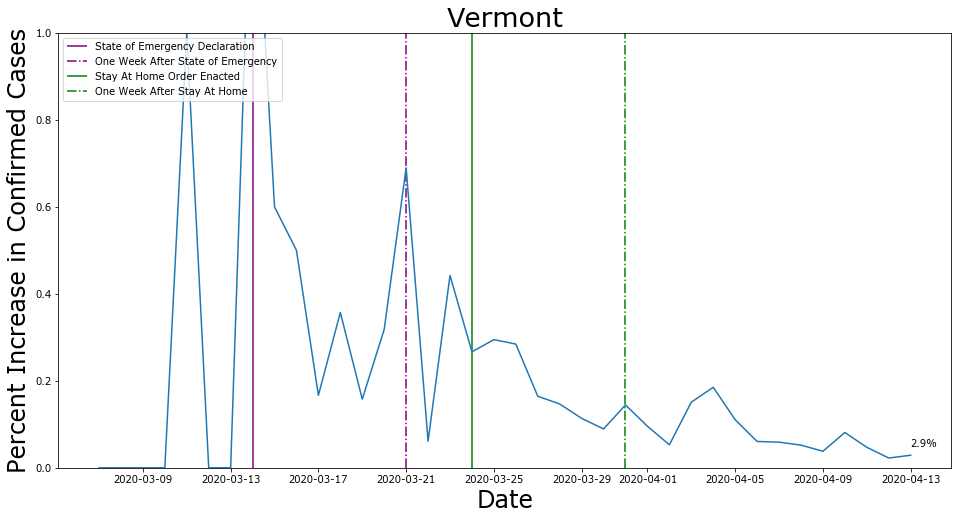

In [89]:
plt.figure(figsize=(16,8))
plt.title("Vermont", size=27)

plt.xlabel('Date', size=24)
plt.ylabel('Percent Increase in Confirmed Cases', size=24)

# https://labor.vermont.gov/news/executive-order-governor-scott-declares-state-emergency-vermont
plt.vlines(x=dt.date(2020, 3, 14), ymin=0, ymax=1, linestyles='solid', color='purple', label='State of Emergency Declaration')
plt.vlines(x=dt.date(2020, 3, 21), ymin=0, ymax=1, linestyle='dashdot', color='purple', label='One Week After State of Emergency')

# https://governor.vermont.gov/press-release/governor-phil-scott-issues-%E2%80%9Cstay-home-stay-safe%E2%80%9D-order-directs-additional-closures
plt.vlines(x=dt.date(2020, 3, 24), ymin=0, ymax=1, linestyles='solid', color='green', label='Stay At Home Order Enacted')
plt.vlines(x=dt.date(2020, 3, 31), ymin=0, ymax=1, linestyle='dashdot', color='green', label='One Week After Stay At Home')

# thousand_case_milestone(vermont_data)

most_recent(vermont_data)

plt.ylim(ymin=0, ymax=1)

plt.plot(vermont_data.percent_change)

plt.legend(loc='upper left');

### Virginia

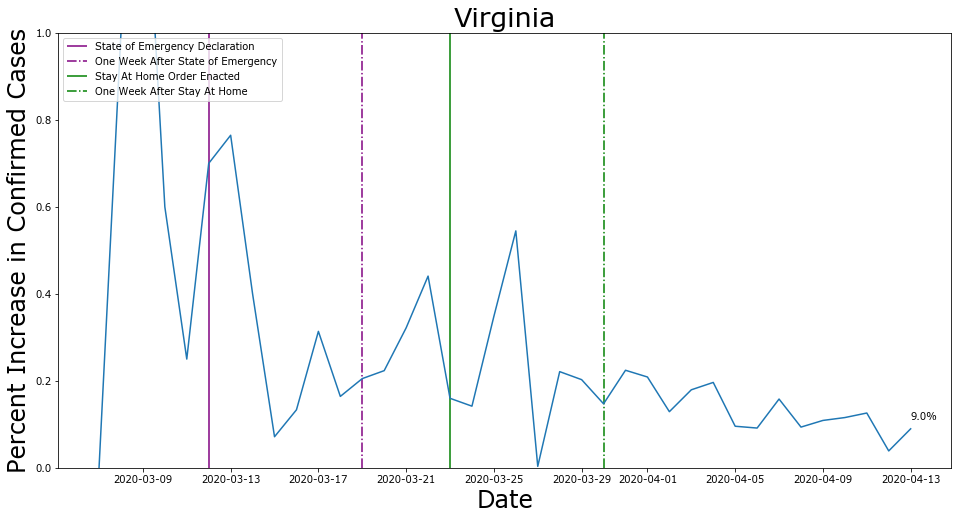

In [90]:
plt.figure(figsize=(16,8))
plt.title("Virginia", size=27)

plt.xlabel('Date', size=24)
plt.ylabel('Percent Increase in Confirmed Cases', size=24)

# https://www.governor.virginia.gov/newsroom/all-releases/2020/march/headline-853537-en.html
plt.vlines(x=dt.date(2020, 3, 12), ymin=0, ymax=1, linestyles='solid', color='purple', label='State of Emergency Declaration')
plt.vlines(x=dt.date(2020, 3, 19), ymin=0, ymax=1, linestyle='dashdot', color='purple', label='One Week After State of Emergency')

# https://www.cnn.com/world/live-news/coronavirus-outbreak-03-23-20-intl-hnk/h_68666f08ca643a0e08c0db83ef5c46fe
plt.vlines(x=dt.date(2020, 3, 23), ymin=0, ymax=1, linestyles='solid', color='green', label='Stay At Home Order Enacted')
plt.vlines(x=dt.date(2020, 3, 30), ymin=0, ymax=1, linestyle='dashdot', color='green', label='One Week After Stay At Home')

# thousand_case_milestone(virginia_data)

most_recent(virginia_data)

plt.ylim(ymin=0, ymax=1)

plt.plot(virginia_data.percent_change)

plt.legend(loc='upper left');

### Connecticut

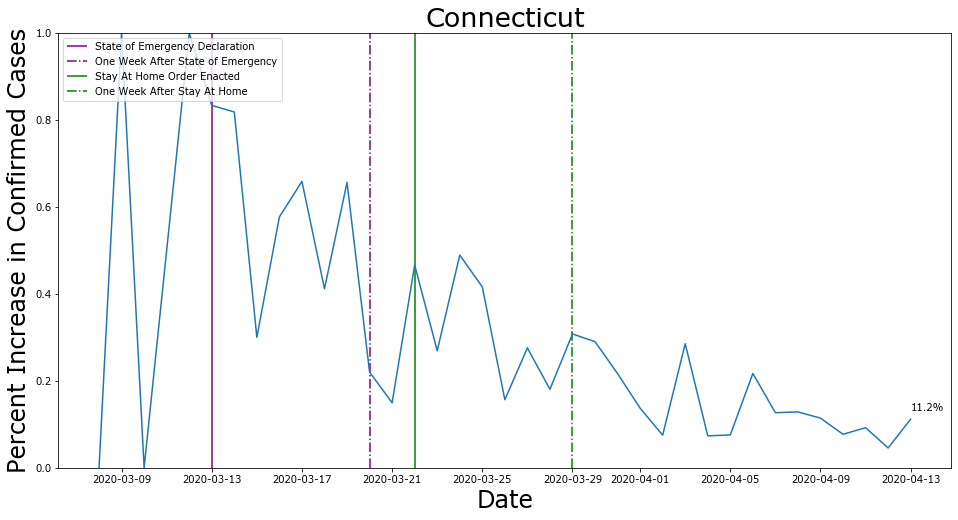

In [92]:
plt.figure(figsize=(16,8))
plt.title("Connecticut", size=27)

plt.xlabel('Date', size=24)
plt.ylabel('Percent Increase in Confirmed Cases', size=24)

# https://www.courant.com/politics/hc-pol-capitol-watch-newsletter-0313-20200313-udbdbu2olfavrfzzecyecpupja-story.html
plt.vlines(x=dt.date(2020, 3, 13), ymin=0, ymax=1, linestyles='solid', color='purple', label='State of Emergency Declaration')
plt.vlines(x=dt.date(2020, 3, 20), ymin=0, ymax=1, linestyle='dashdot', color='purple', label='One Week After State of Emergency')

# https://portal.ct.gov/Office-of-the-Governor/News/Press-Releases/2020/03-2020/Governor-Lamont-Releases-Guidance-to-Businesses-on-Order-Asking-Connecticut-to-Stay-Safe-Stay-Home
plt.vlines(x=dt.date(2020, 3, 22), ymin=0, ymax=1, linestyles='solid', color='green', label='Stay At Home Order Enacted')
plt.vlines(x=dt.date(2020, 3, 29), ymin=0, ymax=1, linestyle='dashdot', color='green', label='One Week After Stay At Home')

# thousand_case_milestone(connecticut_data)

most_recent(connecticut_data)

plt.ylim(ymin=0, ymax=1)

plt.plot(connecticut_data.percent_change)

plt.legend(loc='upper left');

### Iowa

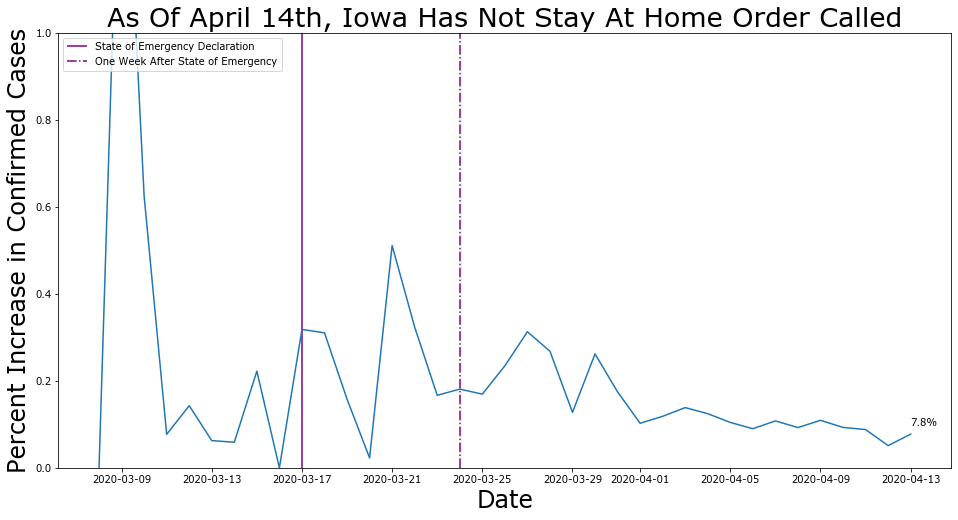

In [93]:
plt.figure(figsize=(16,8))
plt.title("As Of April 14th, Iowa Has Not Stay At Home Order Called", size=27)

plt.xlabel('Date', size=24)
plt.ylabel('Percent Increase in Confirmed Cases', size=24)

# https://governor.iowa.gov/press-release/gov-reynolds-issues-a-state-of-public-health-disaster-emergency
plt.vlines(x=dt.date(2020, 3, 17), ymin=0, ymax=1, linestyles='solid', color='purple', label='State of Emergency Declaration')
plt.vlines(x=dt.date(2020, 3, 24), ymin=0, ymax=1, linestyle='dashdot', color='purple', label='One Week After State of Emergency')

# https://www.wdrb.com/news/coronavirus/7-governors-still-havent-issued-stay-at-home-orders-heres-why/article_13d4c02e-7dc9-11ea-9099-af85f9ed85f7.html
# plt.vlines(x=dt.date(2020, ), ymin=0, ymax=1, linestyles='solid', color='green', label='Stay At Home Order Enacted')
# plt.vlines(x=dt.date(2020, ), ymin=0, ymax=1, linestyle='dashdot', color='green', label='One Week After Stay At Home')

# thousand_case_milestone(iowa_data)

most_recent(iowa_data)

plt.ylim(ymin=0, ymax=1)

plt.plot(iowa_data.percent_change)

plt.legend(loc='upper left');

In [97]:
total_us_data.state.unique()

array(['Washington', 'Illinois', 'California', 'Arizona', 'Massachusetts',
       'Wisconsin', 'Texas', 'Nebraska', 'Utah', 'Oregon', 'Florida',
       'New York', 'Rhode Island', 'Georgia', 'New Hampshire',
       'North Carolina', 'New Jersey', 'Colorado', 'Maryland', 'Nevada',
       'Tennessee', 'Hawaii', 'Indiana', 'Kentucky', 'Minnesota',
       'Oklahoma', 'Pennsylvania', 'South Carolina',
       'District of Columbia', 'Kansas', 'Missouri', 'Vermont',
       'Virginia', 'Connecticut', 'Iowa', 'Louisiana', 'Ohio', 'Michigan',
       'South Dakota', 'Arkansas', 'Delaware', 'Mississippi',
       'New Mexico', 'North Dakota', 'Wyoming', 'Alaska', 'Maine',
       'Alabama', 'Idaho', 'Montana', 'Puerto Rico', 'Virgin Islands',
       'Guam', 'West Virginia', 'Northern Mariana Islands',
       'American Samoa'], dtype=object)

### Louisiana

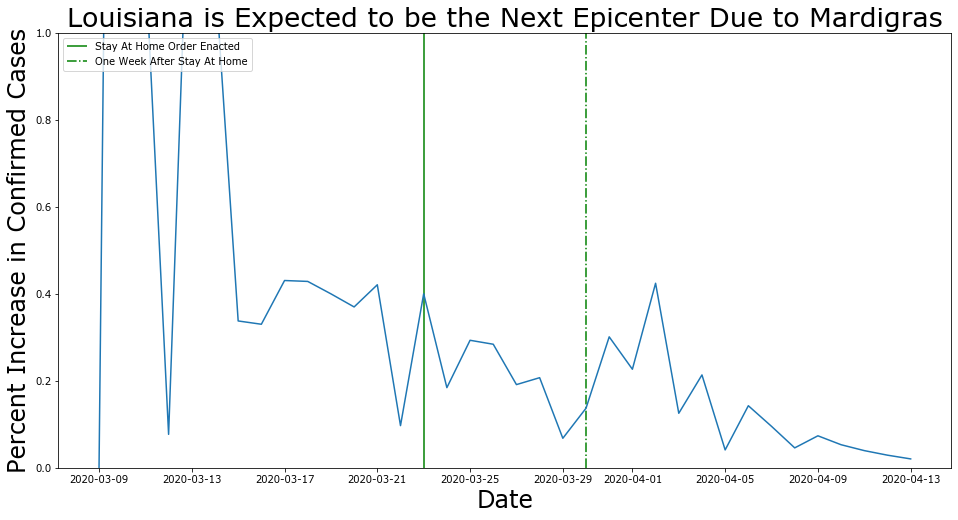

In [43]:
plt.figure(figsize=(16,8))
plt.title("Louisiana is Expected to be the Next Epicenter Due to Mardigras", size=27)

plt.xlabel('Date', size=24)
plt.ylabel('Percent Increase in Confirmed Cases', size=24)

# https://twitter.com/LouisianaGov/status/1241806286699859971?ref_src=twsrc%5Etfw%7Ctwcamp%5Etweetembed%7Ctwterm%5E1241806286699859971&ref_url=https%3A%2F%2Fwww.cnn.com%2F2020%2F03%2F23%2Fus%2Fcoronavirus-which-states-stay-at-home-order-trnd%2Findex.html
plt.vlines(x=dt.date(2020, 3, 23), ymin=0, ymax=1, linestyles='solid', color='green', label='Stay At Home Order Enacted')
plt.vlines(x=dt.date(2020, 3, 30), ymin=0, ymax=1, linestyle='dashdot', color='green', label='One Week After Stay At Home')

plt.ylim(ymin=0, ymax=1)

plt.plot(louisiana_data.percent_change)

plt.legend(loc='upper left');

### Ohio

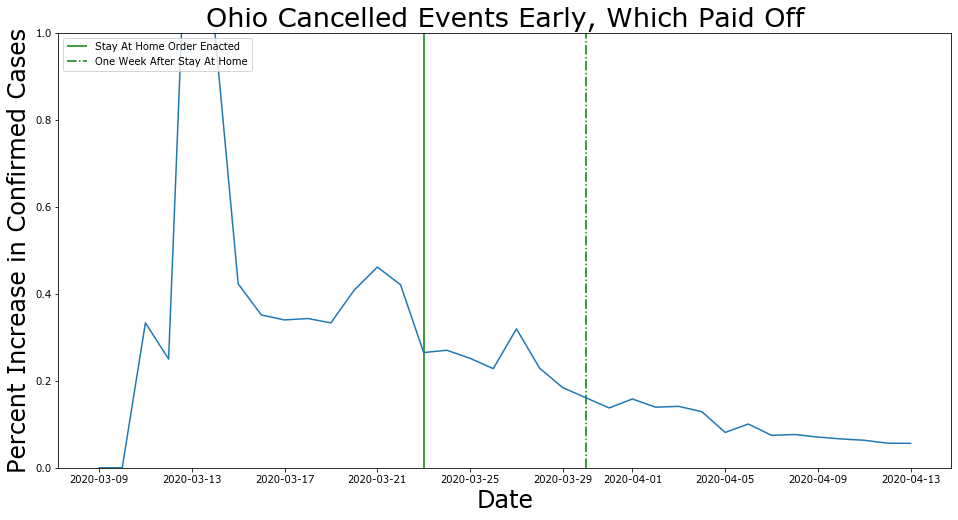

In [44]:
plt.figure(figsize=(16,8))
plt.title("Ohio Cancelled Events Early, Which Paid Off", size=27)

plt.xlabel('Date', size=24)
plt.ylabel('Percent Increase in Confirmed Cases', size=24)

# https://www.littler.com/publication-press/publication/ohio-stay-home-order-effective-march-23-what-it-means-employers
plt.vlines(x=dt.date(2020, 3, 23), ymin=0, ymax=1, linestyles='solid', color='green', label='Stay At Home Order Enacted')
plt.vlines(x=dt.date(2020, 3, 30), ymin=0, ymax=1, linestyle='dashdot', color='green', label='One Week After Stay At Home')

plt.ylim(ymin=0, ymax=1)

plt.plot(ohio_data.percent_change)

plt.legend(loc='upper left');

### Kentucky

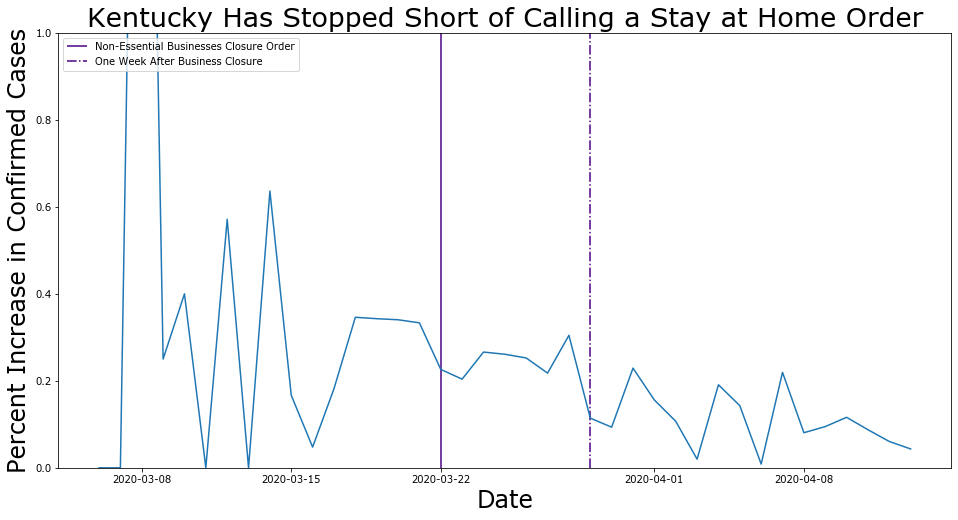

In [45]:
plt.figure(figsize=(16,8))
plt.title("Kentucky Has Stopped Short of Calling a Stay at Home Order", size=27)

plt.xlabel('Date', size=24)
plt.ylabel('Percent Increase in Confirmed Cases', size=24)

# https://kentucky.gov/Pages/Activity-stream.aspx?n=GovernorBeshear&prId=101
plt.vlines(x=dt.date(2020, 3, 22), ymin=0, ymax=1, linestyles='solid', color='indigo', label='Non-Essential Businesses Closure Order')
plt.vlines(x=dt.date(2020, 3, 29), ymin=0, ymax=1, linestyle='dashdot', color='indigo', label='One Week After Business Closure')

plt.ylim(ymin=0, ymax=1)

plt.plot(kentucky_data.percent_change)

plt.legend(loc='upper left');

### Alabama

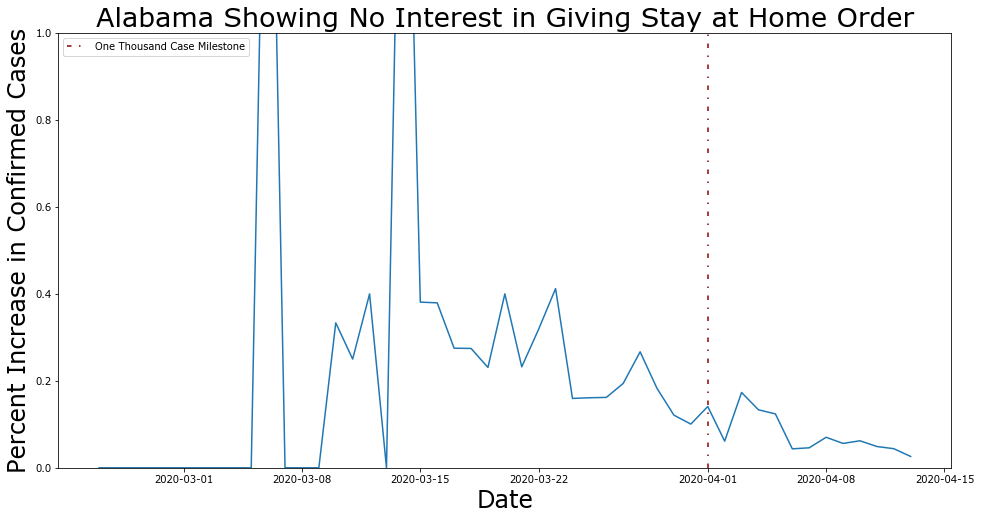

In [46]:
plt.figure(figsize=(16,8))
# https://www.dothanfirst.com/life-health/coronavirus/governors-office-holds-back-on-stay-at-home-order-for-alabama/
plt.title("Alabama Showing No Interest in Giving Stay at Home Order", size=27)

plt.xlabel('Date', size=24)
plt.ylabel('Percent Increase in Confirmed Cases', size=24)

thousand_case_milestone(alabama_data)

plt.ylim(ymin=0, ymax=1)

plt.plot(utah_data.percent_change)

plt.legend(loc='upper left');

### Minnesota

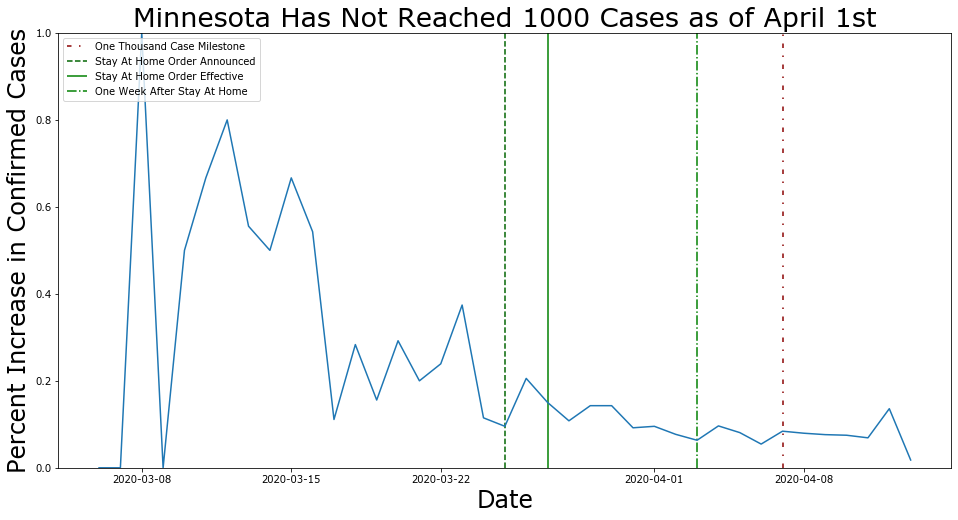

In [47]:
plt.figure(figsize=(16,8))
plt.title("Minnesota Has Not Reached 1000 Cases as of April 1st", size=27)

plt.xlabel('Date', size=24)
plt.ylabel('Percent Increase in Confirmed Cases', size=24)

thousand_case_milestone(minnesota_data)
# https://twitter.com/GovTimWalz/status/1242896254839017472?ref_src=twsrc%5Etfw%7Ctwcamp%5Etweetembed%7Ctwterm%5E1242896254839017472&ref_url=https%3A%2F%2Fwww.cnn.com%2F2020%2F03%2F23%2Fus%2Fcoronavirus-which-states-stay-at-home-order-trnd%2Findex.html
plt.vlines(x=dt.date(2020, 3, 25), ymin=0, ymax=1, linestyle='dashed', color='darkgreen', label='Stay At Home Order Announced')
plt.vlines(x=dt.date(2020, 3, 27), ymin=0, ymax=1, linestyles='solid', color='green', label='Stay At Home Order Effective')
plt.vlines(x=dt.date(2020, 4, 3), ymin=0, ymax=1, linestyle='dashdot', color='green', label='One Week After Stay At Home')

plt.ylim(ymin=0, ymax=1)

plt.plot(minnesota_data.percent_change)

plt.legend(loc='upper left');

In [48]:
total_us_data.state.unique()

array(['Washington', 'Illinois', 'California', 'Arizona', 'Massachusetts',
       'Wisconsin', 'Texas', 'Nebraska', 'Utah', 'Oregon', 'Florida',
       'New York', 'Rhode Island', 'Georgia', 'New Hampshire',
       'North Carolina', 'New Jersey', 'Colorado', 'Maryland', 'Nevada',
       'Tennessee', 'Hawaii', 'Indiana', 'Kentucky', 'Minnesota',
       'Oklahoma', 'Pennsylvania', 'South Carolina',
       'District of Columbia', 'Kansas', 'Missouri', 'Vermont',
       'Virginia', 'Connecticut', 'Iowa', 'Louisiana', 'Ohio', 'Michigan',
       'South Dakota', 'Arkansas', 'Delaware', 'Mississippi',
       'New Mexico', 'North Dakota', 'Wyoming', 'Alaska', 'Maine',
       'Alabama', 'Idaho', 'Montana', 'Puerto Rico', 'Virgin Islands',
       'Guam', 'West Virginia', 'Northern Mariana Islands',
       'American Samoa'], dtype=object)

# Which State's Have the Worst Spread

In [49]:
# This is going to be a tough one to do, but I want to see if there is a pattern of worse spread in states whos Stay at Home policy
# Has exceptions for religious ceremonies

In [50]:
# This is the easiest way to narrow is down to the most recent day
daterange = total_us_data['date'].unique()
most_recent_state_data = total_us_data[total_us_data['date'] == daterange[-1]]

In [51]:
most_recent_state_data.sort_values('percent_change', ascending=False)

,date,state,fips,cases,deaths,percent_change,change_in_cases
2318,2020-04-13,South Dakota,46,868,6,0.189041,138.0
2277,2020-04-13,Arkansas,5,1475,30,0.152344,195.0
2316,2020-04-13,Rhode Island,44,2976,73,0.116698,311.0
2280,2020-04-13,Connecticut,9,13381,602,0.111840,1346.0
2294,2020-04-13,Maine,23,698,19,0.102686,65.0
2324,2020-04-13,Virginia,51,5747,149,0.089685,473.0
2295,2020-04-13,Maryland,24,8936,262,0.086444,711.0
2284,2020-04-13,Georgia,13,13125,479,0.084442,1022.0
2281,2020-04-13,Delaware,10,1761,41,0.083692,136.0
2302,2020-04-13,Nebraska,31,871,19,0.080645,65.0
